# IDA2016Challenge Data Set 

## Table of Content

1. [Introduction](#Introduction)
    1. [Abstract](#Abstract)
    1. [Data Description](#Data_Description)    
    2. [Columns Description](#Columns_Description)
    3. [Project Objective](#Project_Objective)
2. [Fetching Data](#Fetching_Data)
3. [Data Cleaning](#Data_Cleaning)
4. [Summary](#Summary)
5. [Some Useful Functions](#Useful_Functions)
6. [Logistic Regression Model](#Logistic_Regression)
    1. [Baseline Logistic Regression Model](#Baseline_Logistic)
    2. [Logistic Regression Model + cross validation](#Regression_CV)
    3. [Logistic Regression with Class Weights](#Regression_weights)
    4. [Logistic Regression Model without Correlation](#Logistic_Without_Correlation)
    5. [Logistic Regression Model with Imputation](#Logistic_With_Imputation)
    6. [Logistic Regression Model with Regularization](#Logistic_With_Regularization)
    7. [Logistic Regression. Dealing with Outliers](#Logistic_Outliers)
    8. [Logistic Regression. Dealing with Unbalancing. SMOTE](#Logistic_SMOTE)
    9. [Logistic Regression. Econometrical approach and BFE](#Logistic_BFE)
7. [Some KNN Models](#KNN)
8. [Conclusion](#Conclusion)

<a id='Introduction'></a>

## 1. Introduction

<a id='Abstract'></a>

### Abstract

In the jupyter notebook IDA2016Challenge [dataset](https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge) is used to practise feature engineering and feature selection. This dataset is highly imbalanced.<br><br>
Different methods were used in notebook to achieve as high quality training metrics as possible. Logistic regression and knn algorithms were used to train model.<br>

Techniques used:
- Logistic regression - KNN (LR achieved better results)
- Drop NaN - Mode/Median/Zero Imputation (dropping NaN performed better)
- Logistic Regression class weights parameter usage: balanced weights, tuned weights, weights from dataset description
- Excluding correlated features 
- Feature selection via regularization
- Winsorization
- Local Outlier Factor
- SMOTE for different dataset modifications
- Econometrical approach

Due to dataset features best result was achieved by baseline model (drop NaN + logistic regression). Result similar to that was achieved by (drop correlated features + drop NaN + logistic regression tuned weights.)<br>
Regularization, winsorization, LOF, econometrical approach didn't help to gain better results on our dataset.<br>
KNN performed worse than logistic regression. <br>
Drop NaN performed better than imputation. <br>
Tuned weights as imbalanced dataset training technique performed better than SMOTE.<br><br>

Here are result metrics table:

|model + dataset | Accuracy | Precision | Recall | F1 | ROC-AUC |
| --- | --- | --- | --- | --- | --- |
|baseline | 0.961 |	0.783 |	0.900 |	0.837 |	0.934|
|baseline_file | 0.945|	0.733 | 0.957 | 0.830 | 0.950 |
|baseline_class_weights_balanced|0.944|0.870|0.741|0.800|0.860|
|baseline_class_weights_tuned|0.944|0.783|0.783|0.783|0.875|
|baseline_class_weights_given|0.944|0.957|0.710|0.815|0.851|
|data_wo_corr_wo_nan|0.957|0.704|0.905|	0.792|0.933|
|data_wo_corr_wo_nan_tuned_weights|0.970|0.852|0.885|0.868|0.933|
|data_wo_corr_wo_nan_tuned_weights_file|0.948|0.735|0.926|0.820|0.939|
|data_wo_corr_fill_nan_tuned_weights|0.986|0.567|0.594|0.580|0.794|
|data_wo_corr_fill_nan_tuned_weights_file|0.987|0.552|0.629|0.588|0.811|
|data_wo_corr_fill_nan_median_tuned_weights|0.986|0.580|0.590|0.585|0.791|
|data_wo_corr_fill_nan_zero_tuned_weights|0.986|0.593|0.591|0.592|0.792|
|data_wo_corr_fill_nan_zero_tuned_weights_file|0.987|0.548|0.612|0.578|0.802|
|data_fill_nan_zero_tuned_weights|0.986|0.633|0.574|0.602|0.784|
|data_fill_nan_zero_tuned_weights_file|0.986|0.629|0.724|0.673|0.858|
|regularization_5|0.984|0.297|0.533|0.381|0.761|
|regularization_5_tuned_weights|0.983|0.483|0.497|0.490|0.744|
|regularization_10|0.984|0.333|0.543|0.413|0.766|
|regularization_10_tuned_weights|0.982|0.520|0.473|0.495|0.732|
|reg_5_outliers_std|0.979|0.667|0.412|0.509|0.703|
|reg_5_outliers_iqr|0.982|0.600|0.462|0.522|0.727|
|reg_10_outliers_std|0.979|0.667|0.417|0.513|0.705|
reg_10_outliers_iqr|0.981|0.610|0.446|0.515|0.720|
reg_10_lof_tuned_weights|0.982|0.513|0.474|0.493|0.733|
reg_10_smote|0.956|0.910|0.261|0.406|0.630|
data_wo_corr_fillna_zero_smote|0.966|0.933|0.324|0.481|0.661|
data_wo_nan_smote|0.944|0.913|0.724|0.808|0.855|
data_wo_corr_wo_nan_smote|0.952|0.926|0.735|0.820|0.863|
data_with_corr_fill_nan_zero_smote|0.968|0.923|0.334|0.491|0.666|
|econ|0.978|0.420|0.356|0.385|0.673|
|baseline_knn|0.921|0.478|0.846|0.611|	0.887|
|data_fill_nan_zero_knn| 0.988 | 0.447 | 0.766 |0.564|0.878|

Abbreviations used:
- baseline = drop NaN + logistic regression
- \_file - test dataset file aps_failure_test_set.csv used
- class_weights - logistic regression parameter *class_weights* used
- balanced - balanced *class_weights* value
- tuned - *class_weights* tuned via grid search
- given - *class_weights* values from dataset [description](https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge)
- wo_corr - correlated features excluded
- wo_nan - dropped NaNs
- fill_nan - fill NaNs with mode
- fill_nan_median - fill NaNs with median
- fill_nan_zero - fill NaNs with zeros
- regularization_5 - 5 most important features got via regularization
- regularization_10 - 10 most important features got via regularization
- outliers_std - winsorization std border type 
- outliers_iqr - winsorization iqr border type
- lof - local outlier 
- smote - SMOTE used
- econ - econometrical approach
- knn - knn classifier used

<a id ='Data_Description'></a>

### Data Description
The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. 

The datasets' positive class consists of component failures for a specific component of the APS system.

The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class.
The test set contains 16000 examples.

<a id='Columns_Description'></a>

### Columns Description

The attribute names of the data have been anonymized for proprietary reasons. It consists of both single numerical counters and histograms consisting of bins with different conditions. Typically the histograms have open-ended conditions at each end. For example if we measuring the ambient temperature 'T' then the histogram could be defined with 4 bins where:

-bin 1 collect values for temperature `T < -20`
-bin 2 collect values for temperature `T >= -20` and `T < 0`
-bin 3 collect values for temperature `T >= 0` and `T < 20`
-bin 4 collect values for temperature `T > 20`

The attributes are as follows: class, then anonymized operational data. The operational data have an identifier and a bin id, like 'Identifier_Bin'.
In total there are 171 attributes, of which 7 are histogram variabels. Missing values are denoted by `na`.

<a id='Project_Objective'></a>

### Project Objective
Practise feature engineering and feature selection methods on highly imbalanced dataset to achieve best possible training quality metrics.

<a id="Fetching_Data"></a>

## 2. Fetching Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

import missingno as msno

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [3]:
target_variable = 'class'

In [4]:
filename = 'aps_failure_training_set.csv'
if os.path.exists(filename):
    data = pd.read_csv(filename)
else:
    print('File %s not found' % filename)

In [5]:
filename_test = 'aps_failure_test_set.csv'
if os.path.exists(filename_test):
    data_test = pd.read_csv(filename_test)
else:
    print('File %s not found' % filename_test)

In [6]:
data.info

<bound method DataFrame.info of       class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003 ag_004   ag_005   ag_006   ag_007  ag_008 ag_009   ah_000 ai_000 aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000 as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002  az_003   az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  ba_003  ba_004  ba_005   ba_006   ba_007 ba_008 ba_009    bb_000 bc_000 bd_000 be_000 bf_000   bg_000  bh_000   bi_000   bj_000  bk_000  bl_000  bm_000  bn_000  bo_000  bp_000  bq_000  br_000  bs_000     bt_000    bu_000    bv_000    bx_000   by_000  bz_000  ca_000   cb_000   cc_000   cd_000  ce_000 cf_000 cg_000 ch_000      ci_000     cj_000      ck_000 cl_000 cm_000 cn_000 cn_001 cn_002  cn_003   cn_004   cn_005   cn_006  cn_007 cn_008 cn_009 co_000 cp_000    cq_000 cr_000 cs_000 cs_001  cs_002   cs_003  cs_004   cs_005   c

<a id='Data_Cleaning'></a>

## 3. Data Cleaning

Let's replace all `na` with numpy NaN.

In [7]:
data = data.replace('na', np.nan)
data_test = data_test.replace('na', np.nan)

Let's replace target variable values to apply logistic regression.

In [8]:
data[target_variable] = data[target_variable].replace('neg', 0)
data[target_variable] = data[target_variable].replace('pos', 1)

In [9]:
data_test[target_variable] = data_test[target_variable].replace('neg', 0)
data_test[target_variable] = data_test[target_variable].replace('pos', 1)

Let's find all columns with Nans.

In [10]:
nan_columns = data.isna().any()
columns_with_nan = data.columns[nan_columns].tolist()
len(columns_with_nan)

169

In [11]:
for col_name in columns_with_nan:
    print(col_name)
    print(data[col_name].describe())

ab_000
count     13671
unique       29
top           0
freq      10977
Name: ab_000, dtype: object
ac_000
count     56665
unique     2061
top           0
freq       8752
Name: ac_000, dtype: object
ad_000
count     45139
unique     1886
top           0
freq       2009
Name: ad_000, dtype: object
ae_000
count     57500
unique      333
top           0
freq      55543
Name: ae_000, dtype: object
af_000
count     57500
unique      418
top           0
freq      55476
Name: af_000, dtype: object
ag_000
count     59329
unique      154
top           0
freq      59133
Name: ag_000, dtype: object
ag_001
count     59329
unique      617
top           0
freq      58587
Name: ag_001, dtype: object
ag_002
count     59329
unique     2422
top           0
freq      56181
Name: ag_002, dtype: object
ag_003
count     59329
unique     7879
top           0
freq      46894
Name: ag_003, dtype: object
ag_004
count     59329
unique    23071
top           0
freq       1305
Name: ag_004, dtype: object
ag_005
cou

count     57277
unique    16547
top           0
freq      13841
Name: bz_000, dtype: object
ca_000
count     55644
unique    28318
top           0
freq        109
Name: ca_000, dtype: object
cb_000
count     59274
unique    30170
top           0
freq        109
Name: cb_000, dtype: object
cc_000
count     56745
unique    43859
top           0
freq        878
Name: cc_000, dtype: object
cd_000
count       59324
unique          1
top       1209600
freq        59324
Name: cd_000, dtype: object
ce_000
count     57498
unique    22075
top           0
freq      11845
Name: ce_000, dtype: object
cf_000
count     45139
unique      525
top           0
freq      21468
Name: cf_000, dtype: object
cg_000
count     45139
unique      646
top           4
freq       2935
Name: cg_000, dtype: object
ch_000
count     45139
unique        2
top           0
freq      45129
Name: ch_000, dtype: object
ci_000
count     59662
unique    45964
top           0
freq        223
Name: ci_000, dtype: object
cj_000
co

count     57276
unique       28
top           0
freq      57021
Name: ef_000, dtype: object
eg_000
count     57277
unique       49
top           0
freq      56794
Name: eg_000, dtype: object


All columns with NaN have object dtype, as NaNs were marked as 'na'. Let's change there type to float.

In [12]:
for col_name in columns_with_nan:
    data[col_name] = data[col_name].astype(float)

In [13]:
for col_name in columns_with_nan:
    data_test[col_name] = data_test[col_name].astype(float)

In [14]:
data.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,59329.000000,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.935500e+04,57275.000000,57273.000000,57497.000000,57500.000000,5.935800e+04,5.935800e+04,5.941100e+04,5.941100e+04,3.696600e+04,3.272300e+04,2.045100e+04,1.599100e+04,1.366700e+04,1.226000e+04,1.127800e+04,1.073600e+04,5.927400e+04,5.983300e+04,5.930900e+04,5.930900e+04,5.674300e+04,5.952700e+04,5.727700e+04,55644.000000,5.927400e+04,5.674500e+04,59324.0,5.749800e+04,4.513900e+04,45139.000000,45139.000000,5.966200e+04,5.966200e+04,5.966200e+04,50447.000000,50123.000000,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,4.513900e+04,57276.000000,5.930900e+04,13671.000000,59331.000000,59331.000000,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,46192.000000,46192.000000,4.619200e+04,4.619200e+04,46192.000000,4.619200e+04,46192.000000,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,1.162622e+03,7.849608e+03,4.420992e+03,8.066082e+03,8

In [15]:
data_test.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,16000.000000,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.582500e+04,1.583700e+04,1.583700e+04,1.480200e+04,1.583100e+04,1.583700e+04,1.583100e+04,1.583800e+04,1.583100e+04,1.583800e+04,15236.000000,1.583700e+04,1.583700e+04,1.583700e+04,15312.000000,15312.000000,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15808.000000,15808.000000,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.582500e+04,15236.000000,15236.000000,15310.000000,15311.000000,1.583100e+04,1.583100e+04,1.583800e+04,1.583800e+04,9.906000e+03,8.774000e+03,5.454000e+03,4.287000e+03,3.624000e+03,3.279000e+03,3.019000e+03,2.871000e+03,1.579800e+04,1.597200e+04,1.581000e+04,1.581000e+04,1.513400e+04,15893.000000,1.523700e+04,14794.000000,1.579800e+04,1.513500e+04,15815.0,1.531200e+04,12019.000000,12019.000000,12019.000000,1.591400e+04,1.591400e+04,1.591400e+04,13541.000000,13422.000000,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,12019.000000,15237.000000,1.581000e+04,3637.000000,15811.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,12282.000000,12282.000000,1.228200e+04,1.228200e+04,12282.000000,1.228200e+04,12282.000000,12282.000000,1.228200e+04,15312.000000,15236.000000,1.490600e+04,1.490600e+04,1.490600e+04,1.490600e+04,14906.000000,1.490600e+04,1.490600e+04,1.490600e+04,1.581000e+04,1.523600e+04,15236.000000,1.523600e+04,1.523600e+04,1.523600e+04,15236.000000,1.523600e+04,1.523600e+04,1.523600e+04,1.523600e+04,15238.000000,15238.000000,1.490600e+04,13356.000000,13541.000000,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,0.023438,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,4.905419e+05,1.175855e+06,1.697994e+06,5.063700e+05,3.592157e+04,5.784848e+03,1.917730e+06,1.177257e+04,1.255392e+03,9.293197e+02,7.088737e+04,1.121029e+05,3.660705e+06,3.178963e+06,1.076361e+06,4.746624e+05,0.477684,6.994376e+02,5.664122e+03,5.599370e+02,1251.024164,387.126959,2.525683e+04,1.562926e+04,1.276750e+04,7.682922e+03,8.642176e+03,8.670319e+04,1.094536e+06,1.597340e+06,1.183459e+06,1.141714e+03,8.086509e+03,4.732478e+03,7.971604e+03,8.95266

In [16]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,Na

<a id='Summary'></a>

## 4. Summary

In [17]:
data[target_variable].value_counts()

0    59000
1     1000
Name: class, dtype: int64

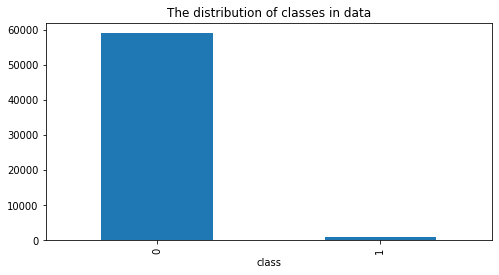

In [18]:
data.groupby(target_variable)[target_variable].count().plot.bar(figsize=( 8, 4),                            
                                  align='center', title="The distribution of classes in data")

In [19]:
data_test[target_variable].value_counts()

0    15625
1      375
Name: class, dtype: int64

As we see from the above our dataset is highly unbalanced. The part of class `1` in the train dataset is 0.017, in the test dataset is 0.024. The good news is that distribution of classes in our train and test dataset is approximately the same.

<a id = 'Useful_Functions'></a>

## 5. Some Useful Functions

In [20]:
def class_distribution_plot(data):
    data.groupby(target_variable)[target_variable].count().plot.bar(figsize=( 8, 4),                            
                                  align='center', title="The distribution of classes in data")

In [21]:
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=[target_variable], axis=1),
    data[target_variable],
    test_size=test_size,
    stratify=data[target_variable],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [22]:
def scale_data(X_train, X_test, scaler_type="minmax"):
    if scaler_type=="minmax":
        scaler = MinMaxScaler()
    elif scaler_type=="std":
        scaler = StandardScaler()
    elif scaler_type=="robust":
        scaler = RobustScaler()
        
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

In [23]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

In [24]:
def assess_data(data, df_quality, exp_name, verbose=False, class_weight=None):
    X_train, X_test, y_train, y_test = data_split_train_test(data)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    model_LogR = LogisticRegression(solver="liblinear", class_weight = class_weight)
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [25]:
def fill_NA(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum()>0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

In [26]:
def get_balanced_sample(data, n=500):
    data_0 = data[data[target_variable]==0].sample(n=n)
    data_1 = data[data[target_variable]==1].sample(n=n)
    return pd.concat([data_0, data_1])

In [27]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.1,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

In [28]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [29]:
def get_lof_outliers(data_df, verbose=True, neighbors_cnt=500):
    model_LOF = LocalOutlierFactor(n_neighbors=neighbors_cnt)
    outlier_indicator = model_LOF.fit_predict(data_df)
    if verbose:
        print("Number of outliers: {} / {}".format(
            len(outlier_indicator[outlier_indicator==-1]),
            len(outlier_indicator)
        ))
    outlier_indicator = pd.Series(outlier_indicator, name="LOF_outlier").replace({1:0, -1:1})
    return outlier_indicator

In [30]:
def assess_data_wo_splitting(X_train_scaled, X_test_scaled,
                            y_train, y_test,
                            df_quality, exp_name, verbose=False, class_weight=None):
    
    model_LogR = LogisticRegression(solver="liblinear", class_weight=class_weight)
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [31]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def winsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

<a id='Logistic_Regression'></a>

## 6. Logistic Regression Model

<a id = 'Baseline_Logistic'></a>

### Baseline Logistic Regression Model

Let's apply logistic regression model to our dataset with excluded NaNs.

In [32]:
data_wo_nan = data.dropna()

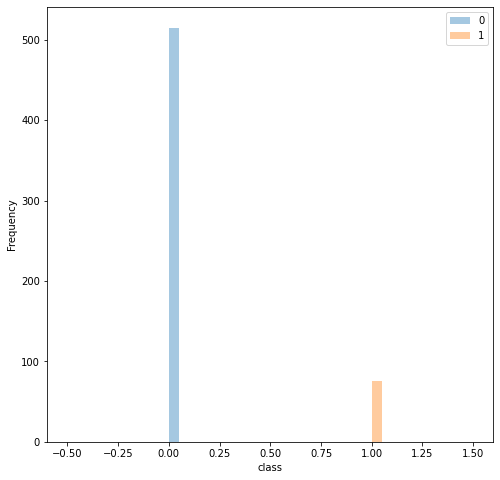

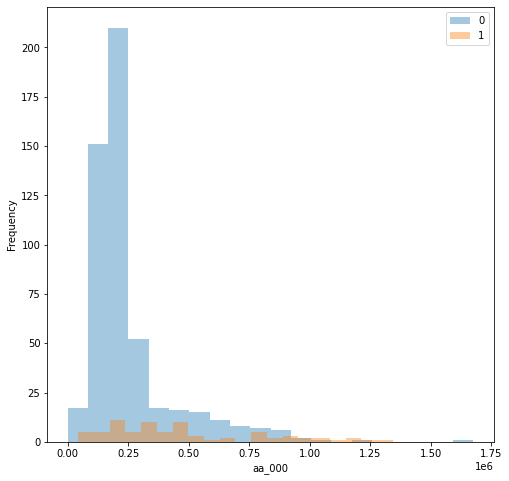

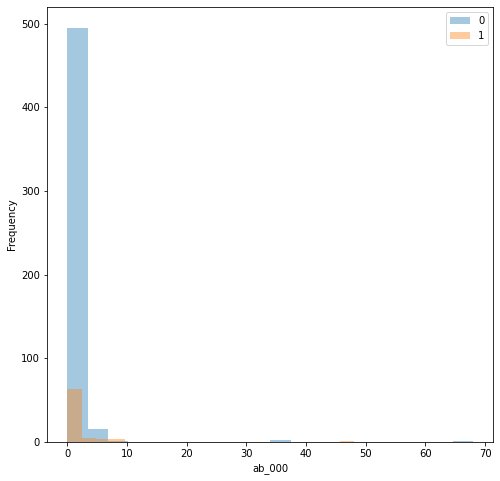

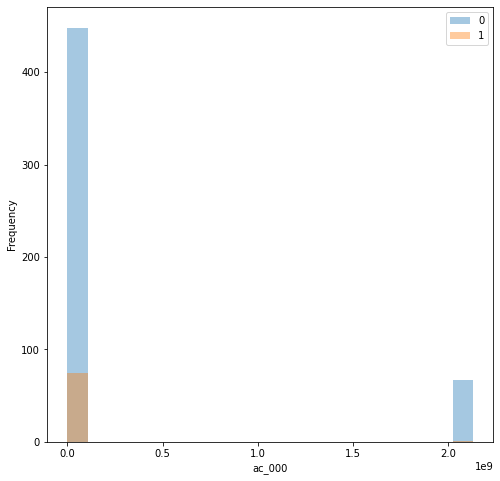

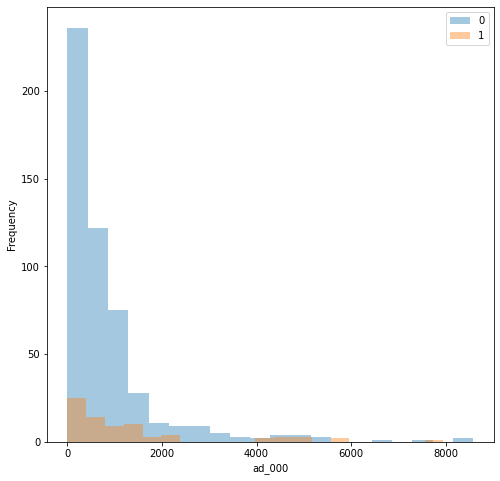

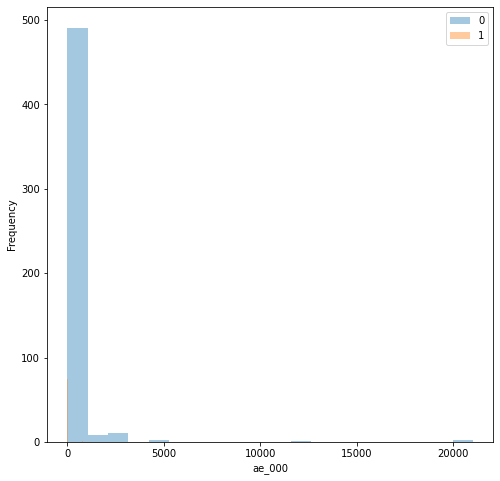

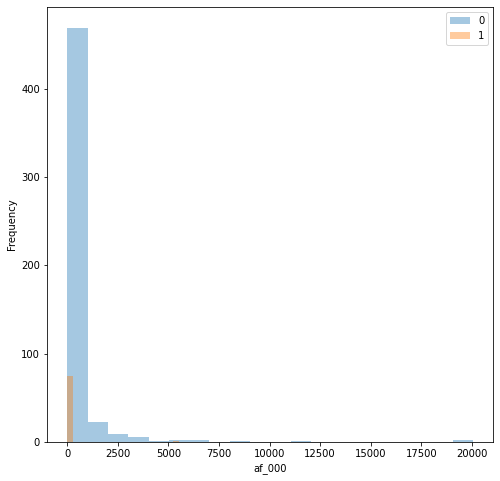

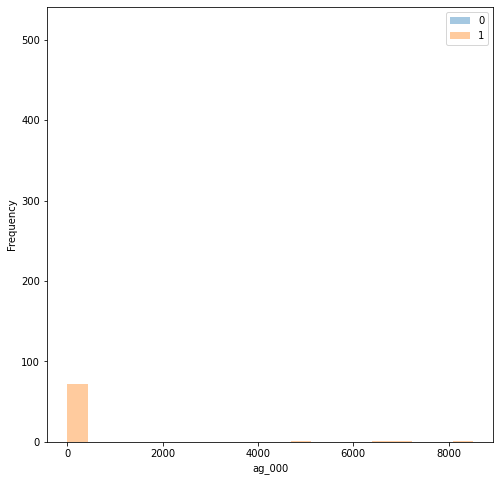

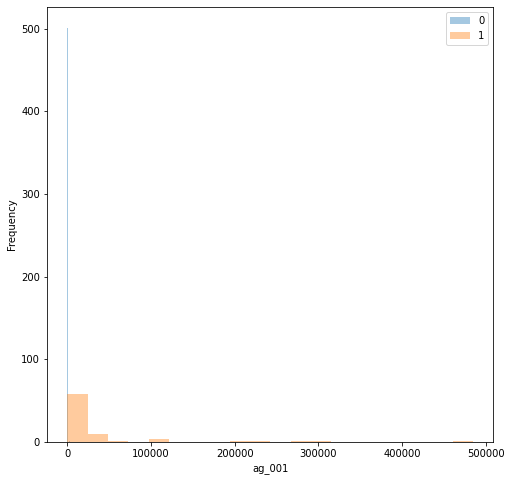

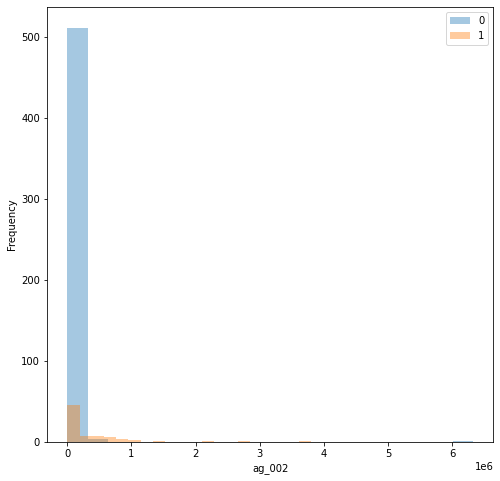

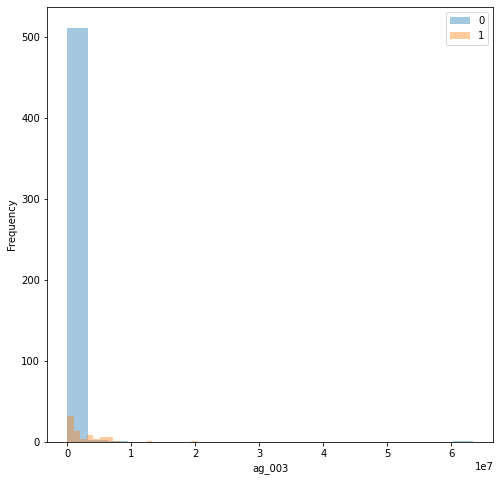

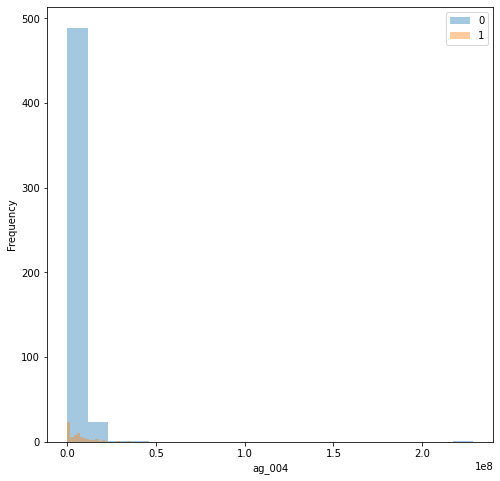

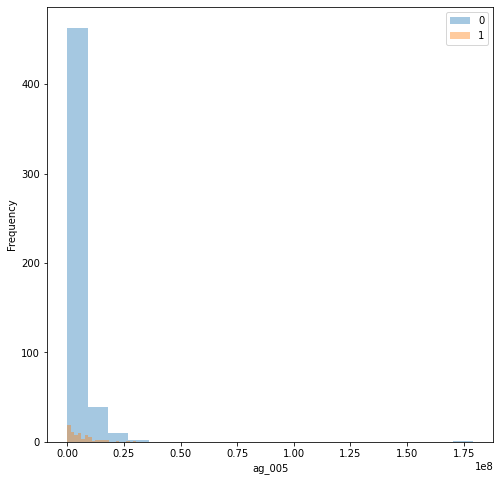

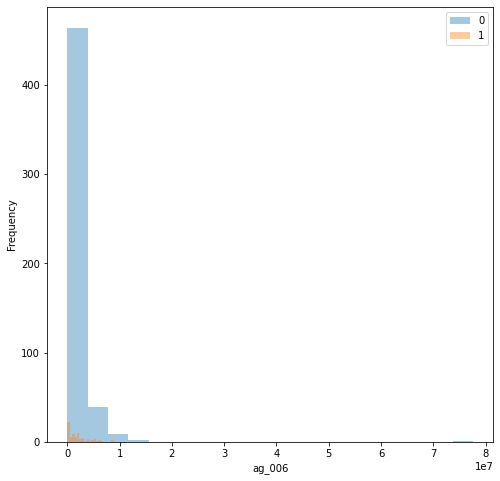

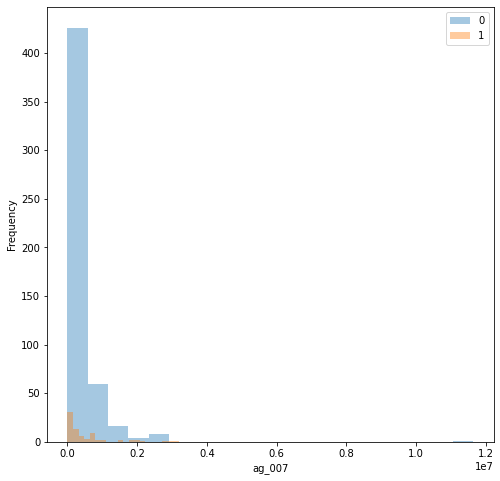

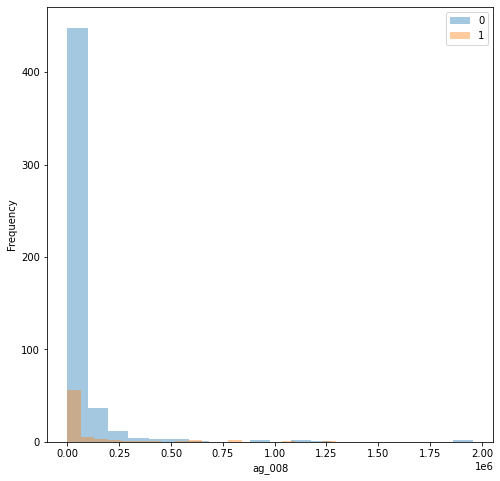

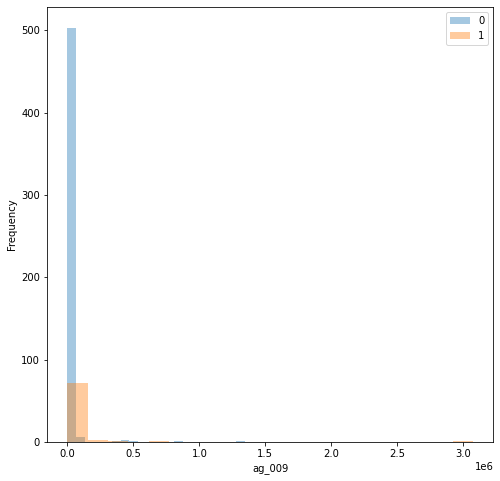

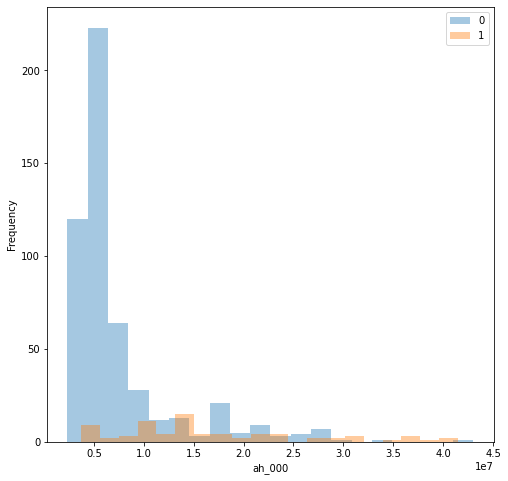

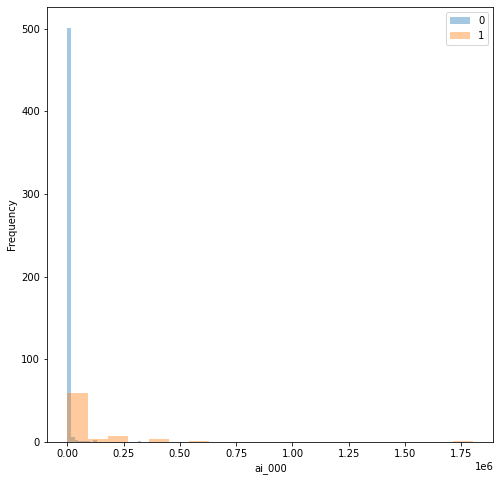

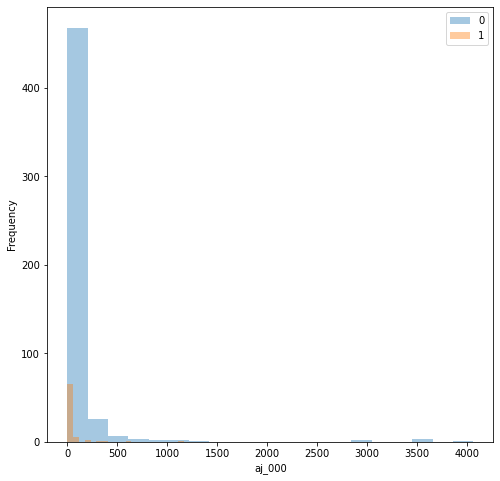

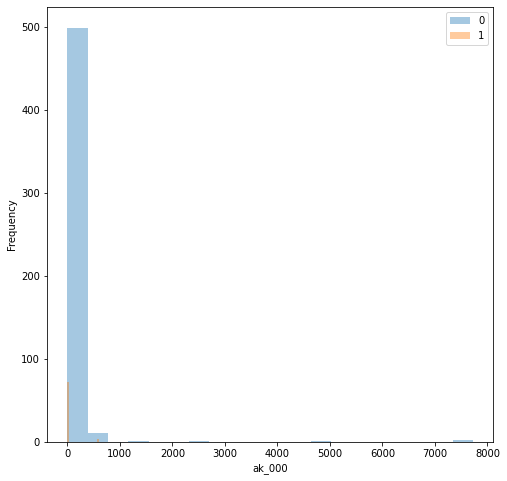

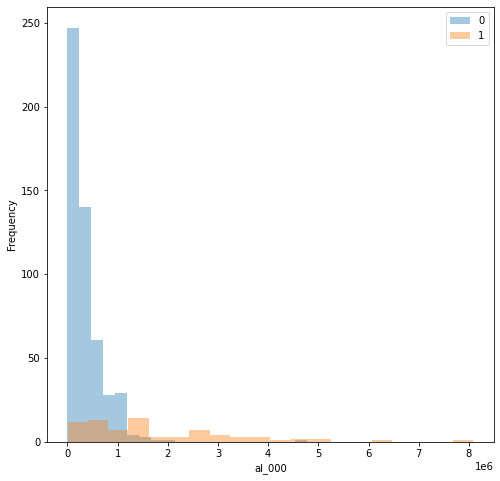

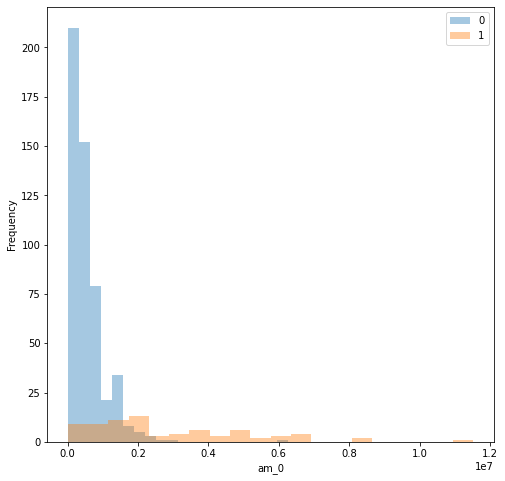

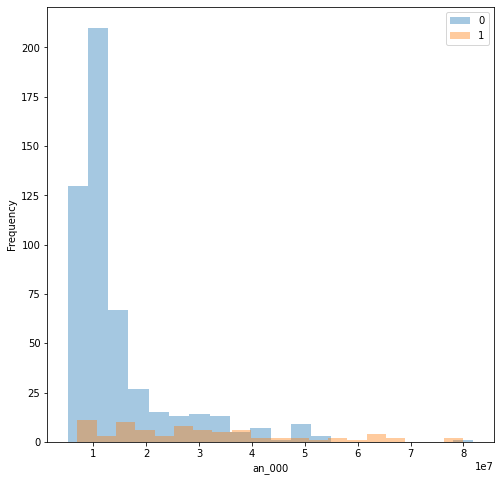

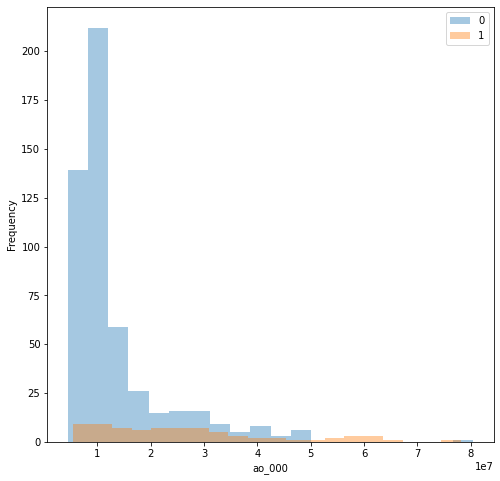

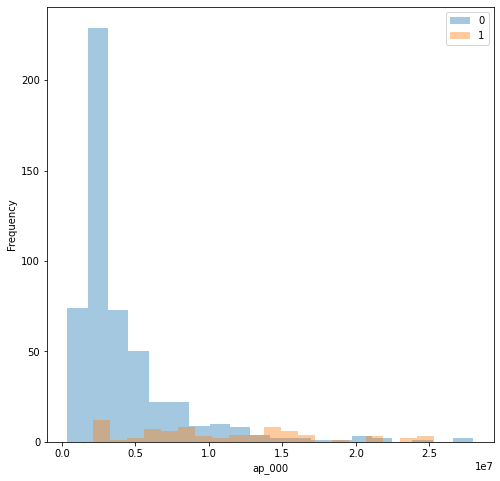

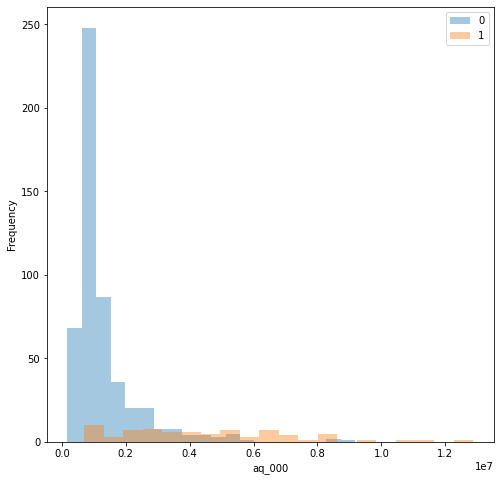

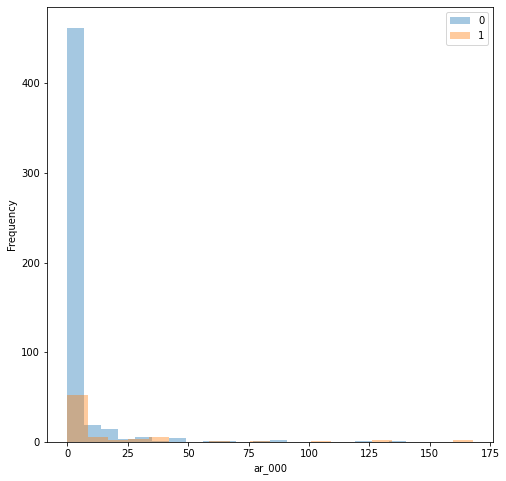

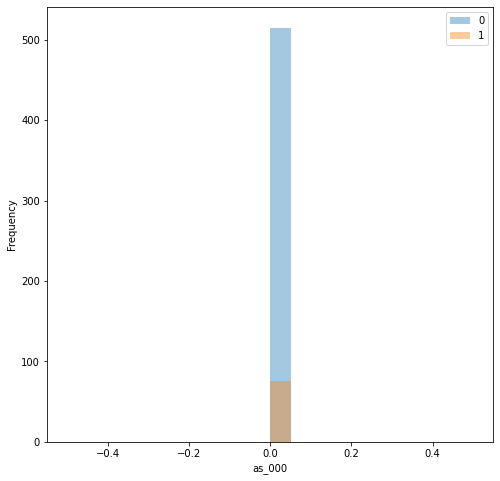

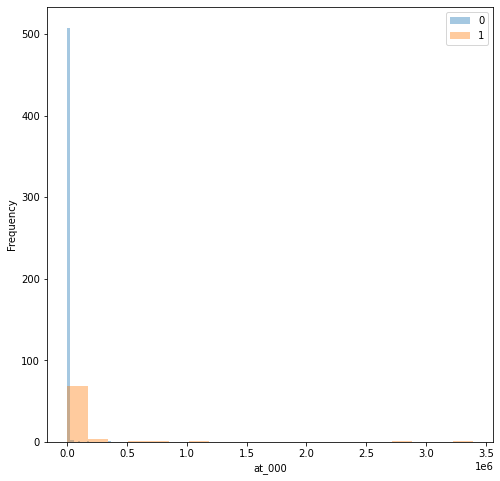

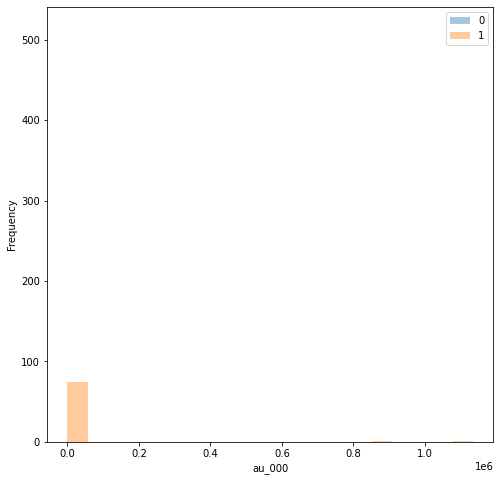

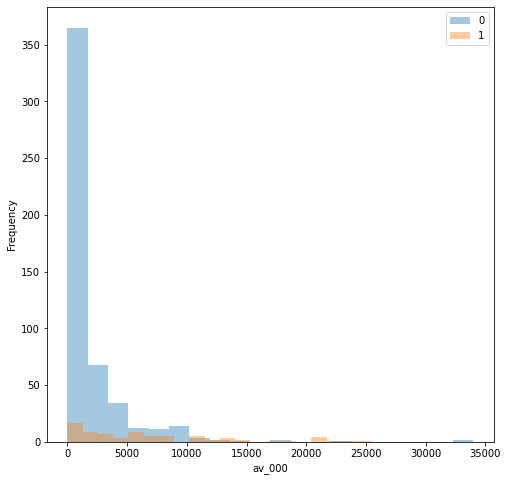

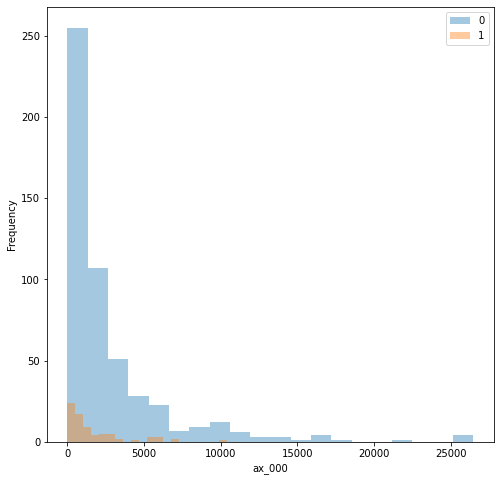

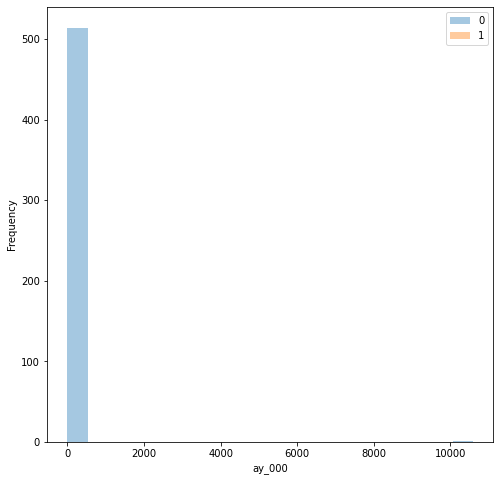

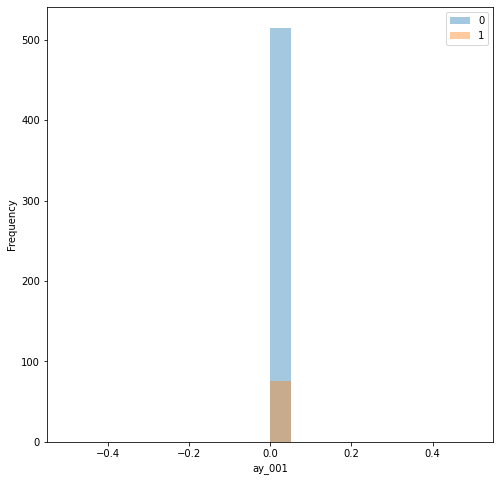

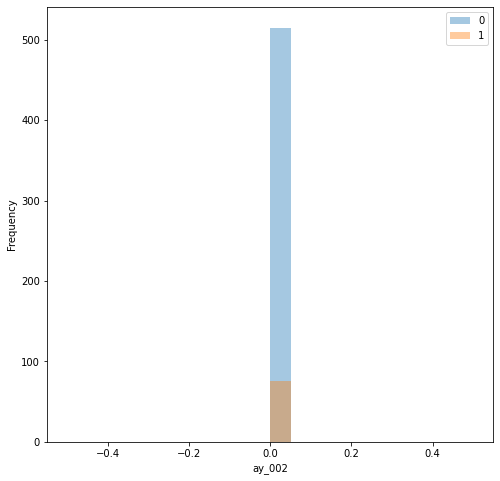

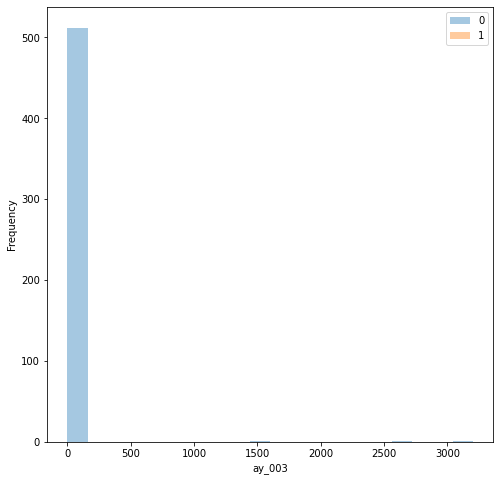

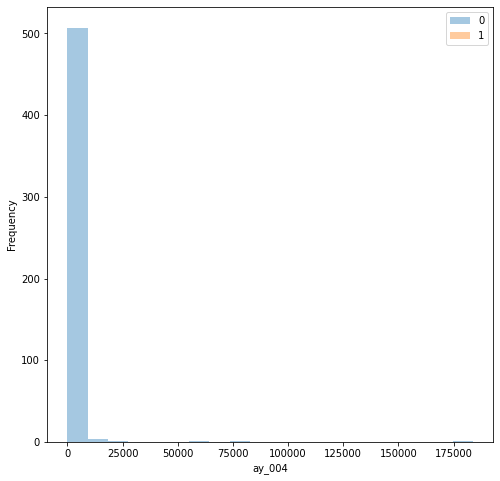

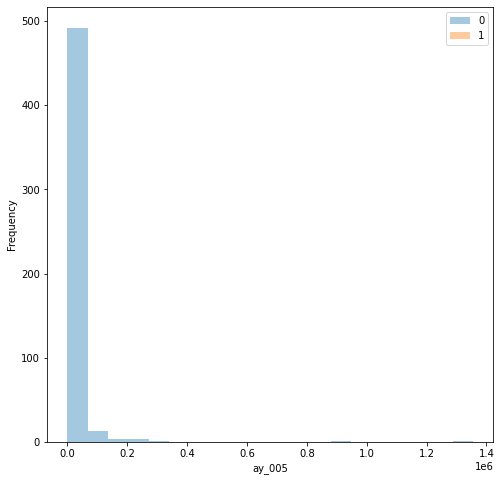

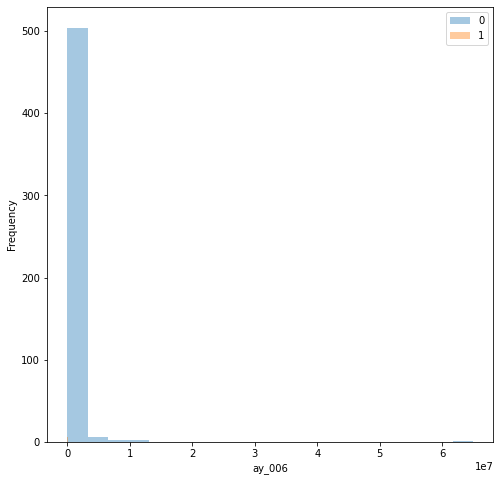

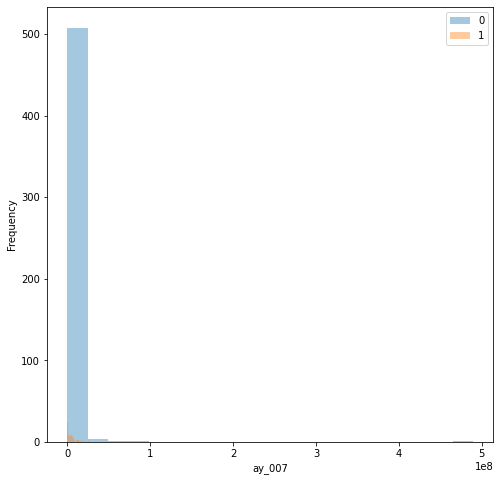

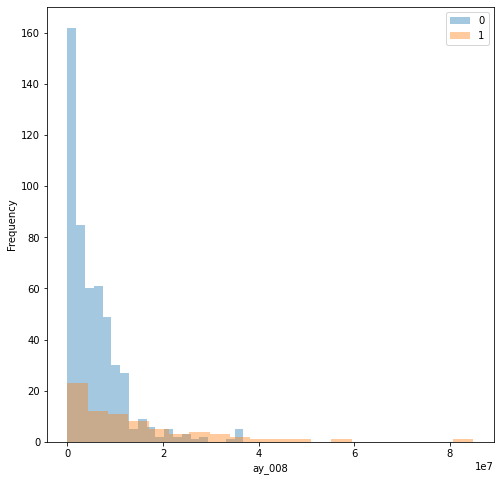

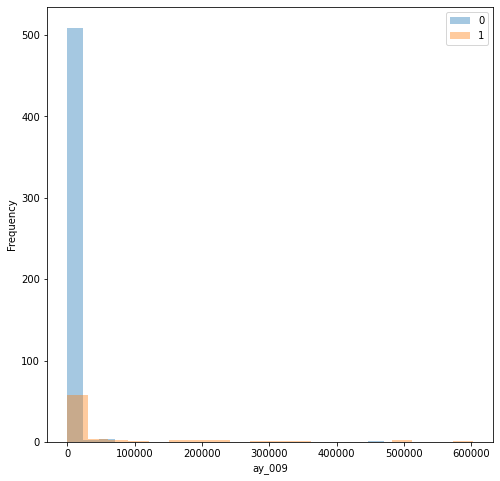

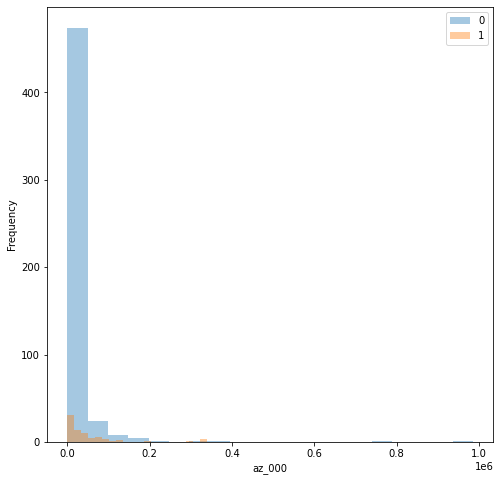

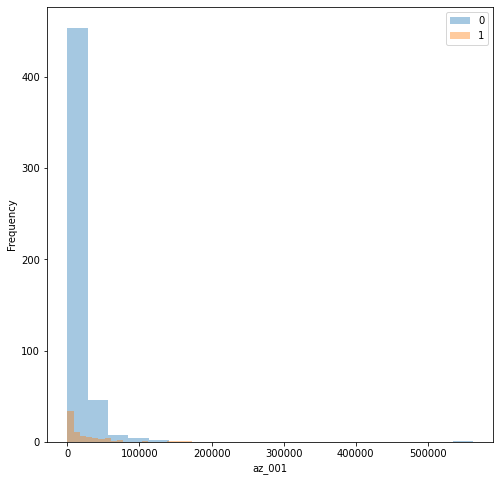

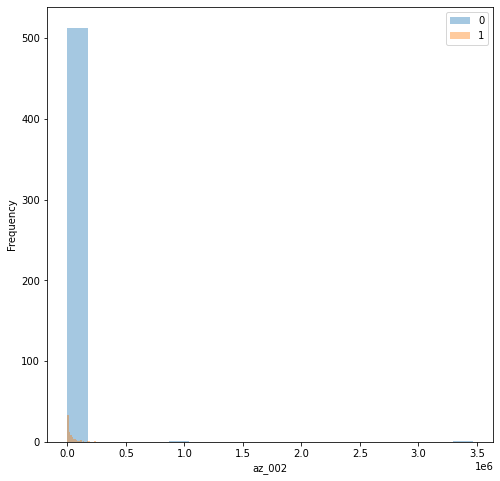

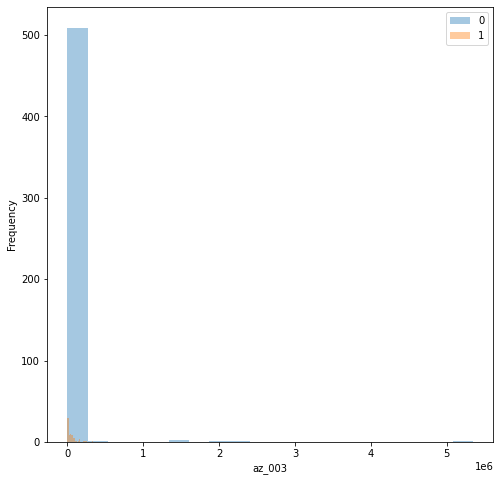

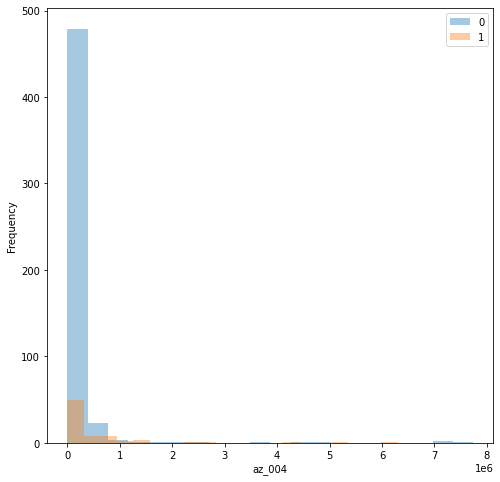

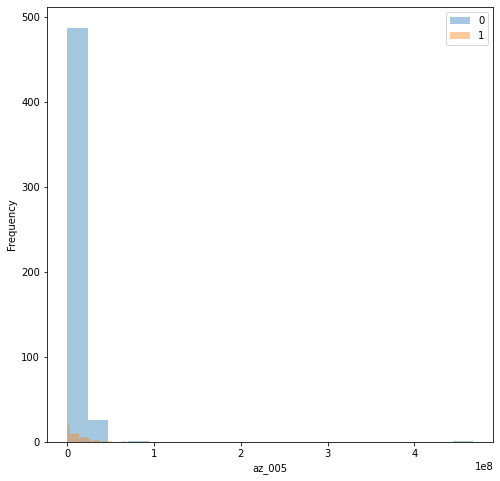

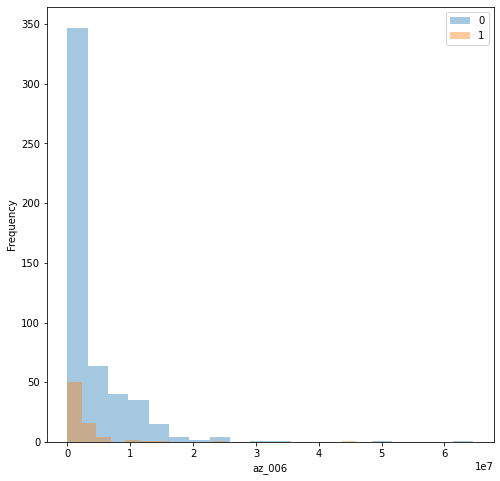

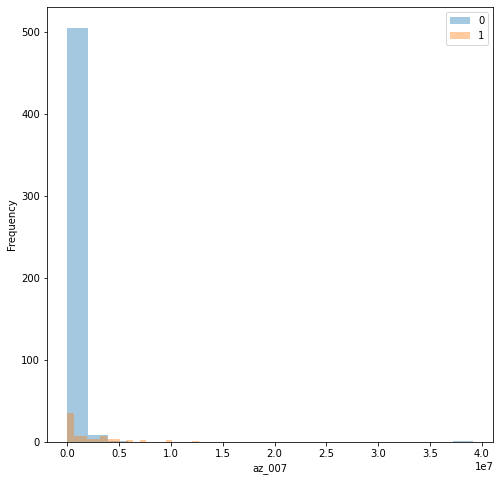

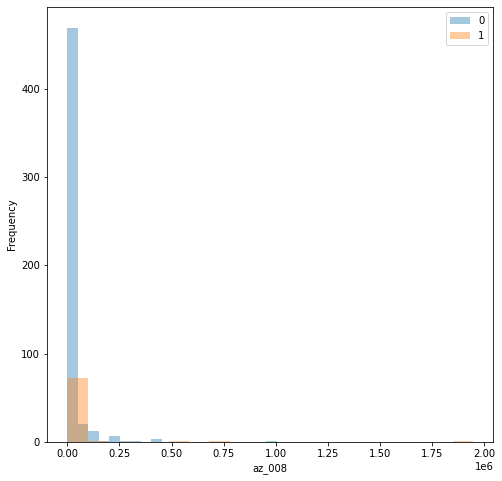

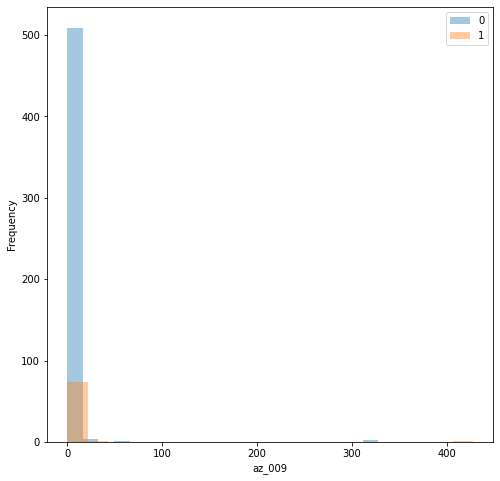

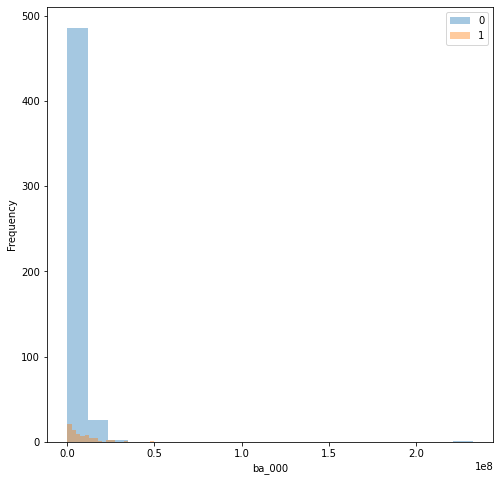

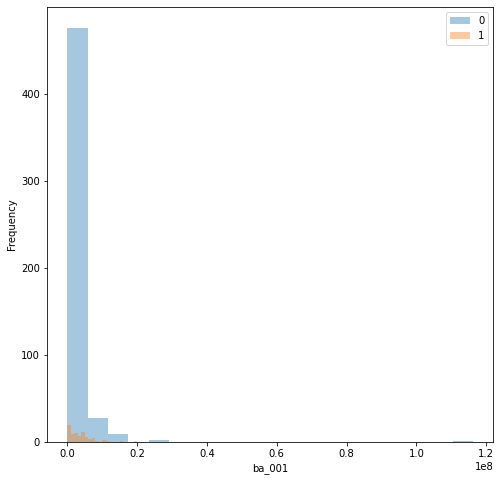

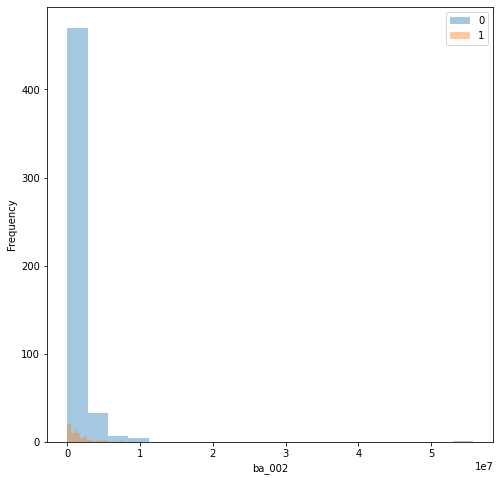

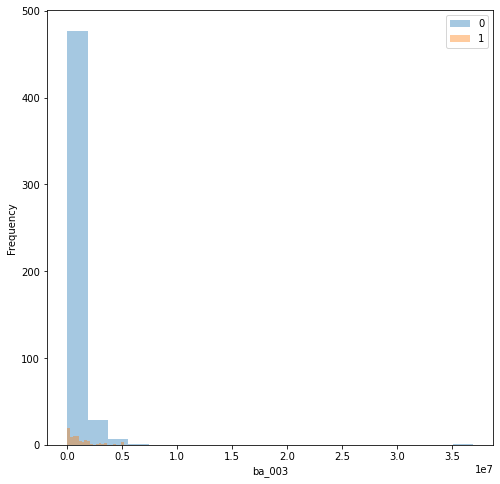

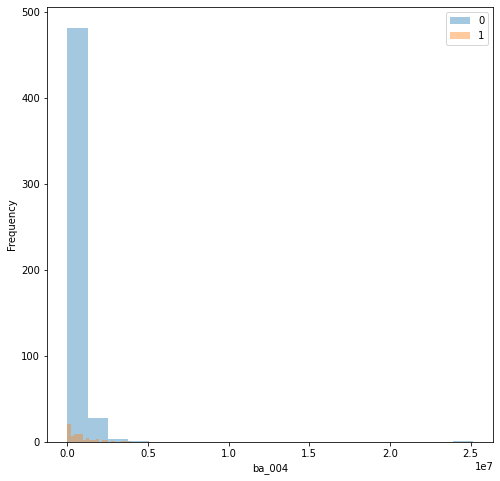

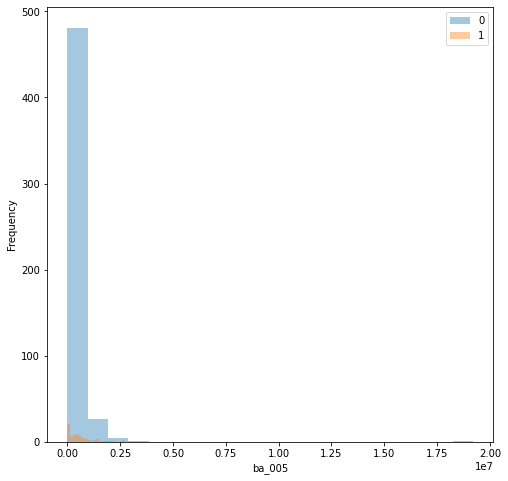

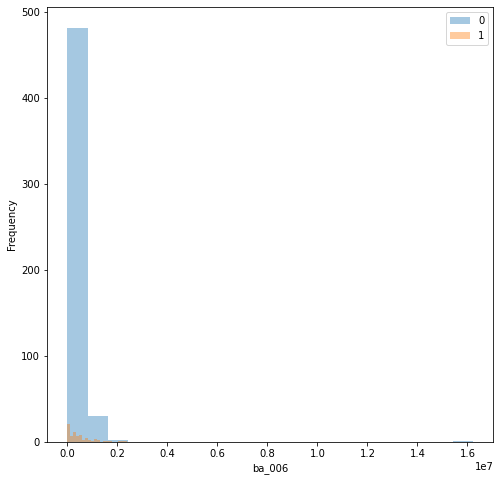

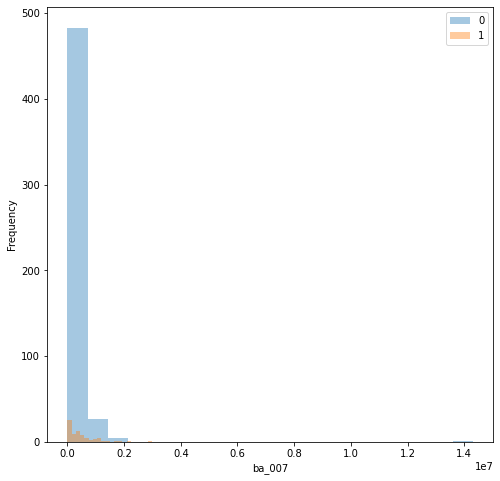

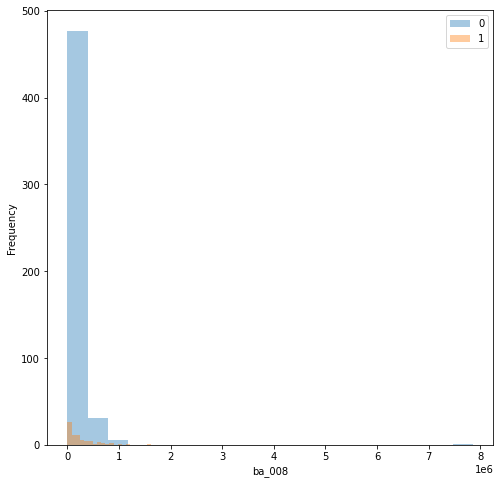

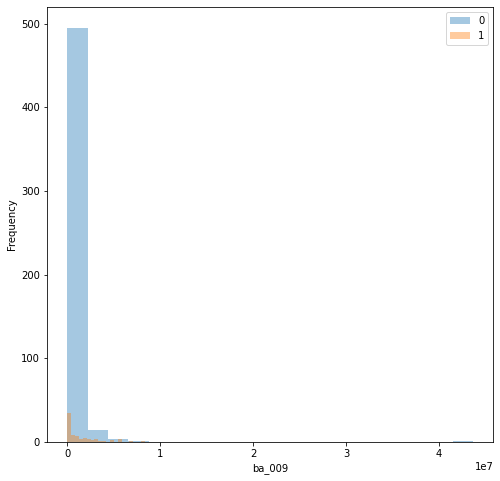

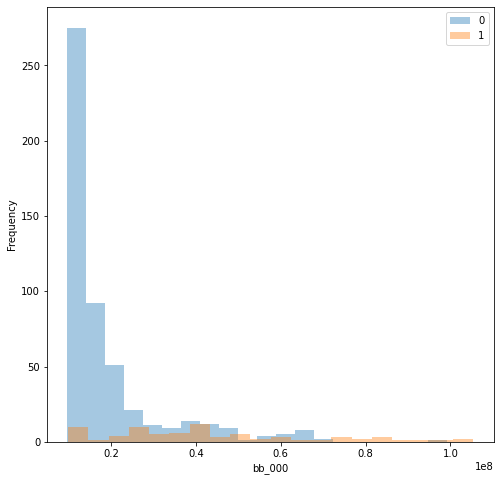

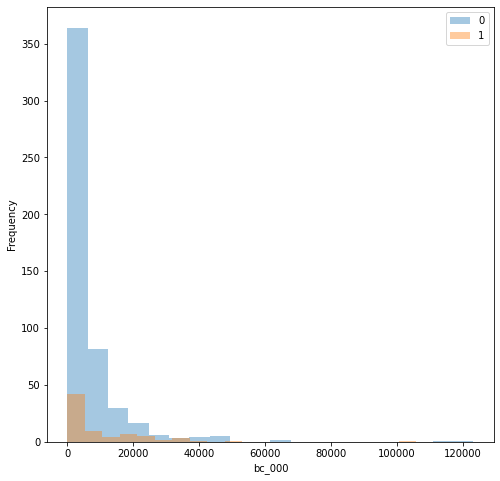

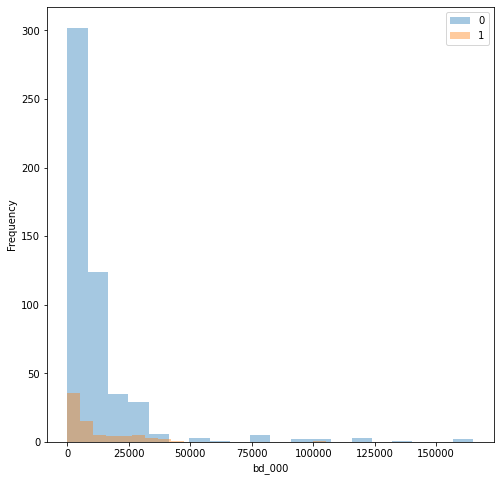

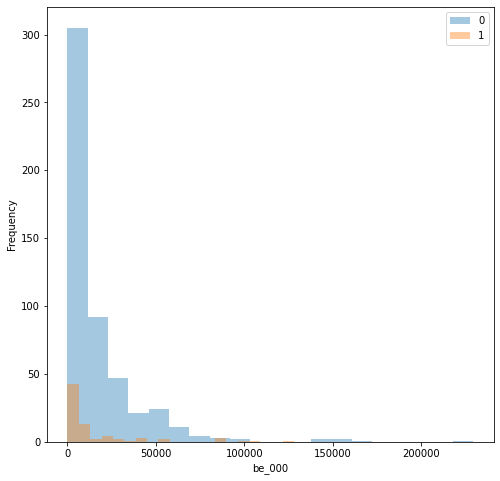

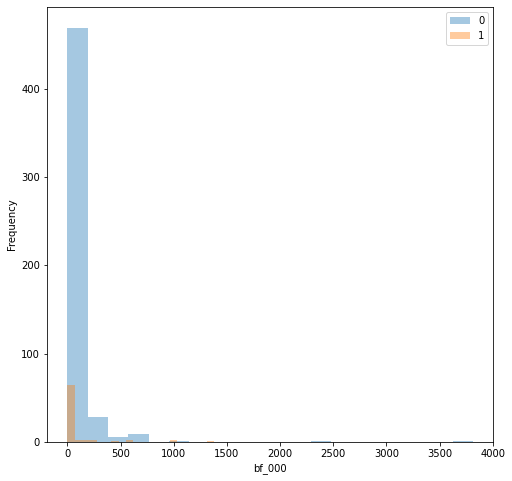

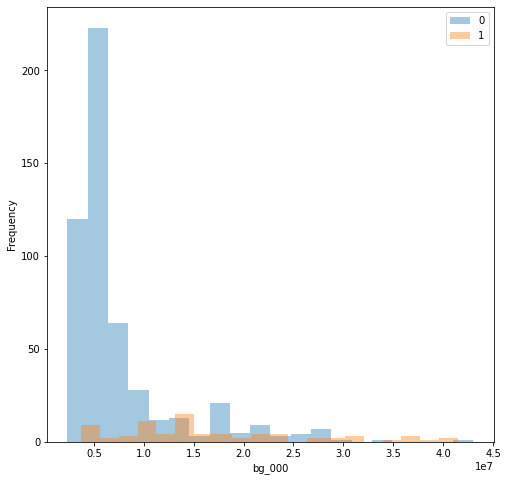

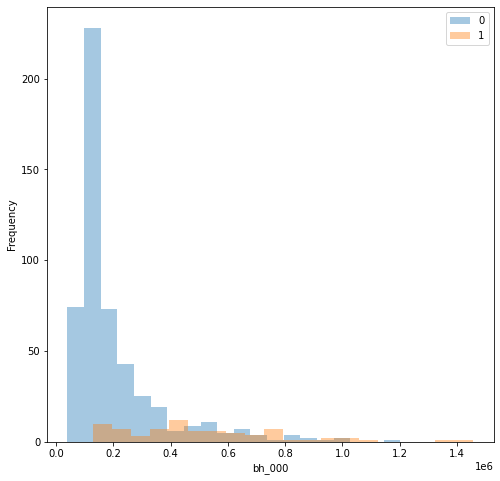

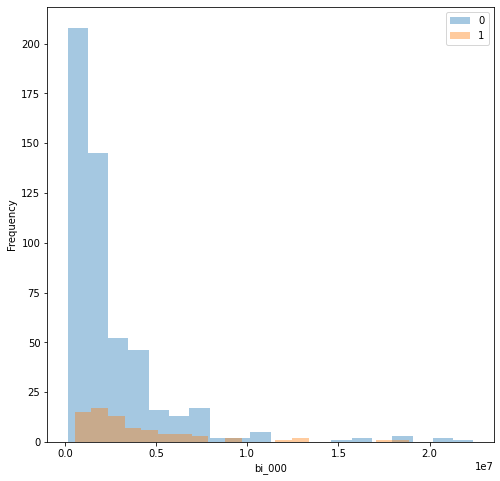

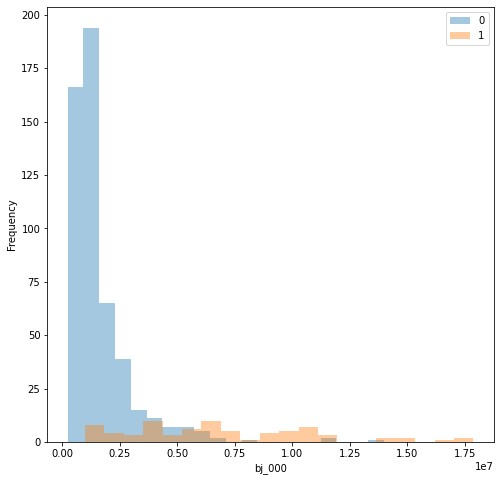

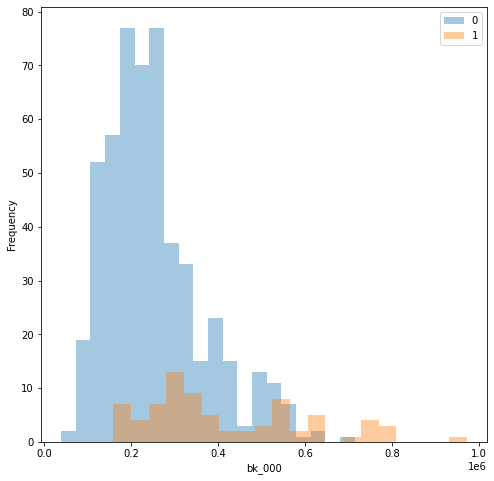

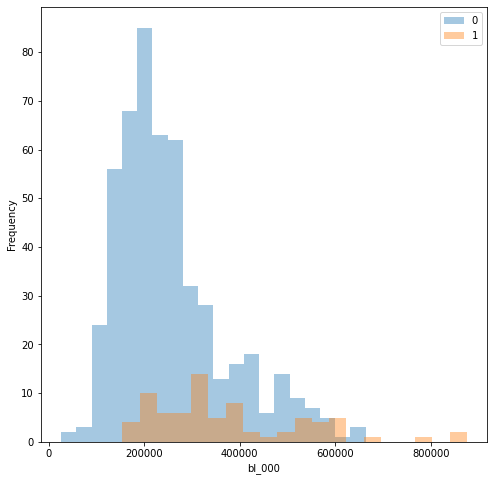

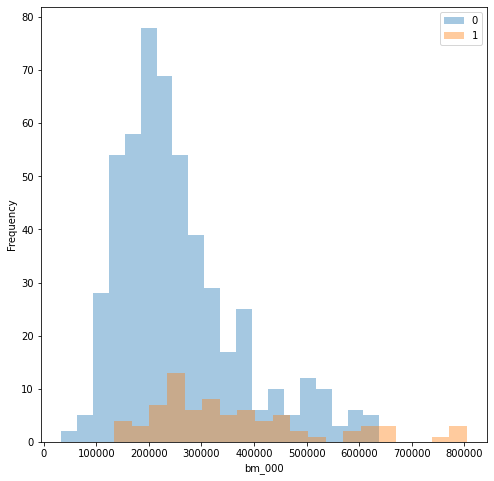

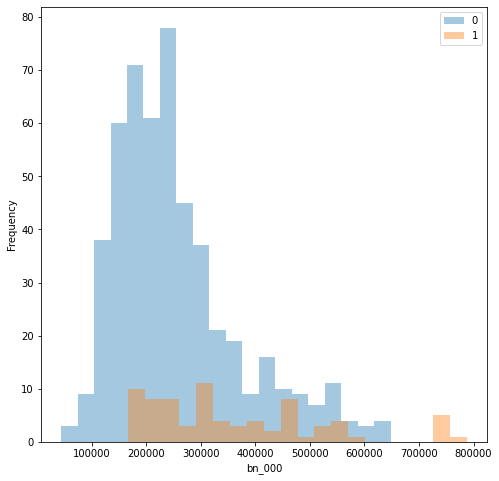

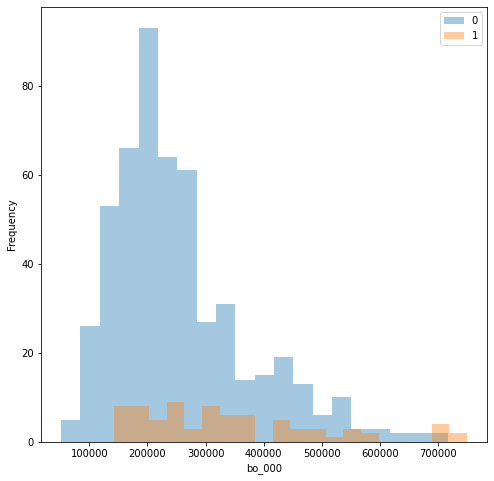

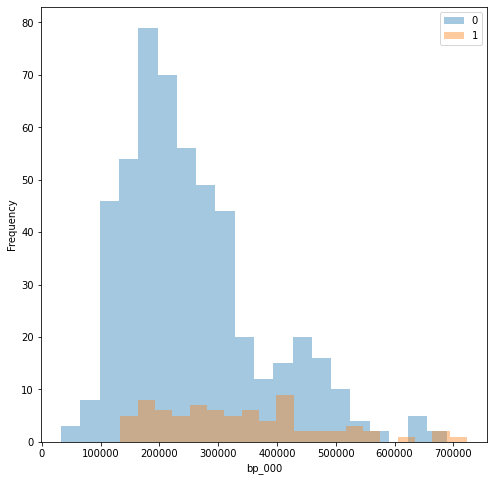

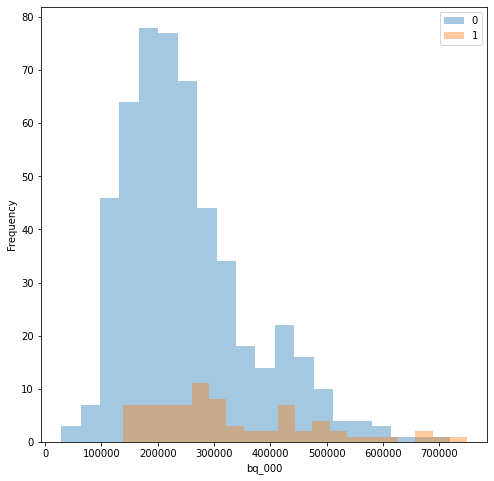

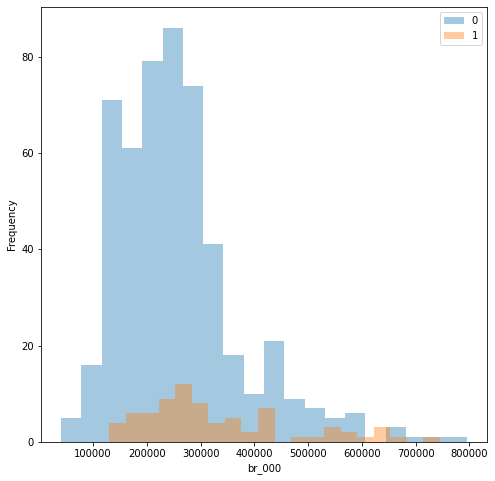

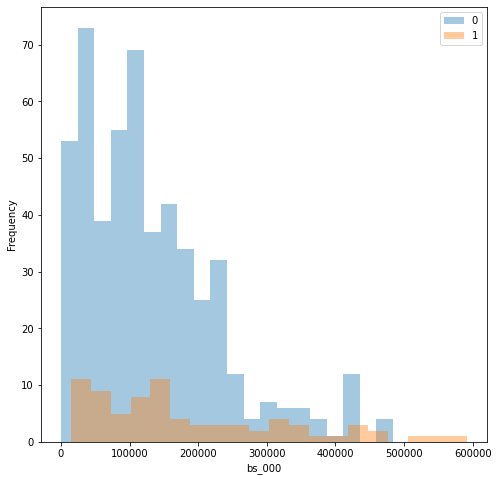

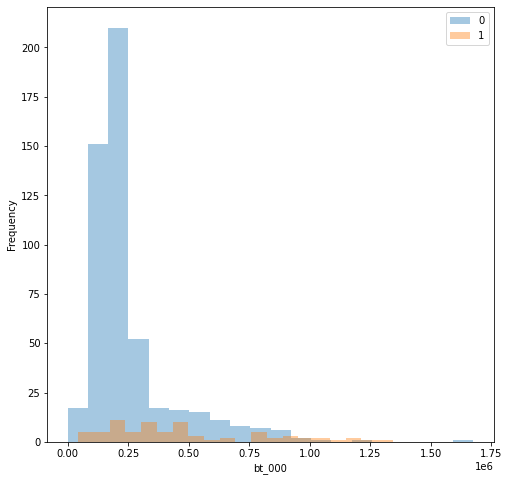

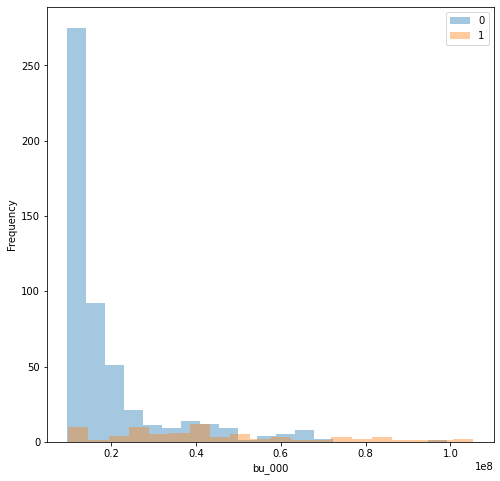

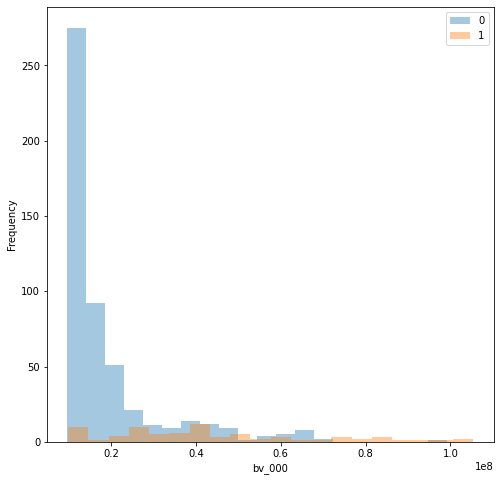

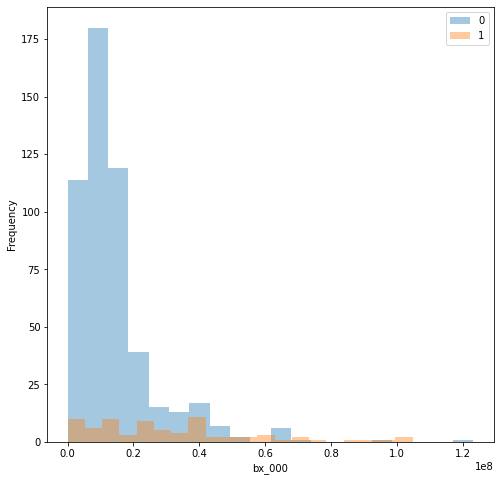

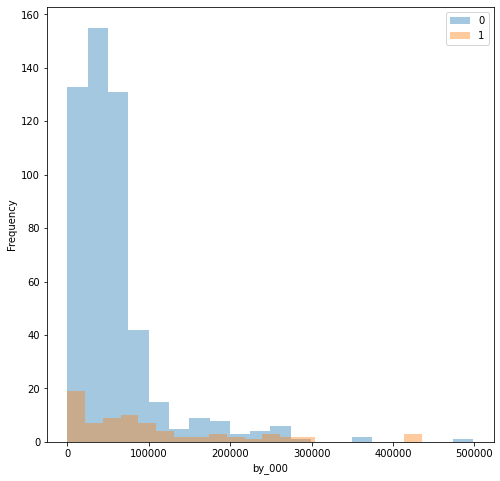

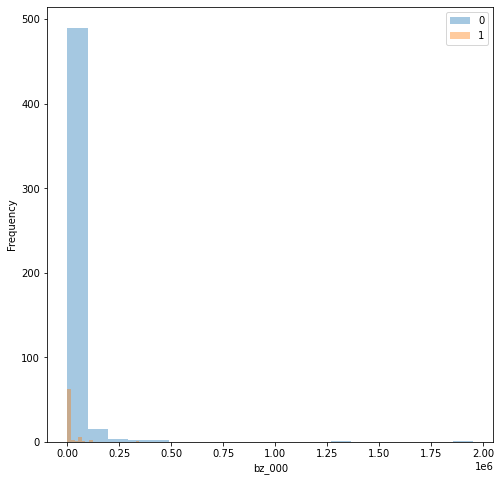

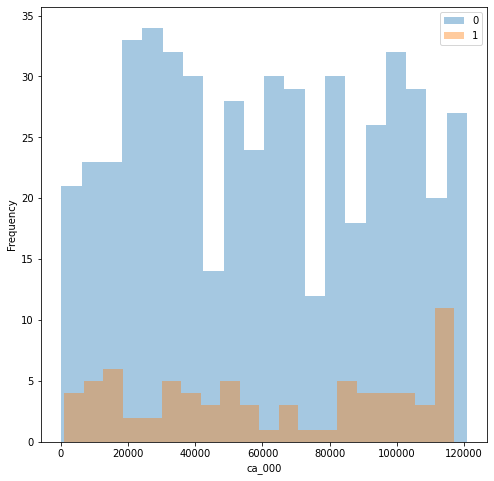

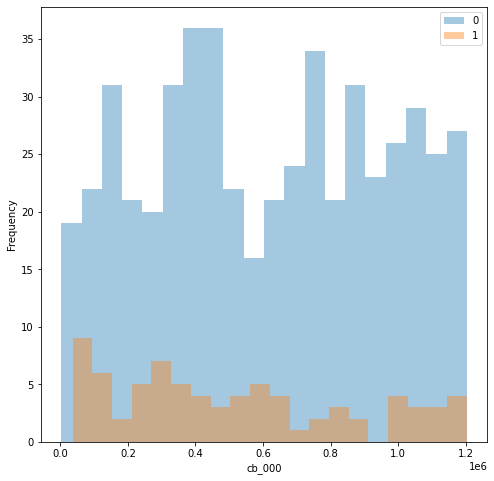

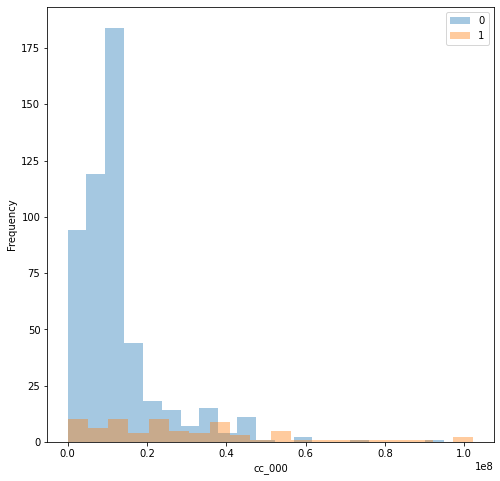

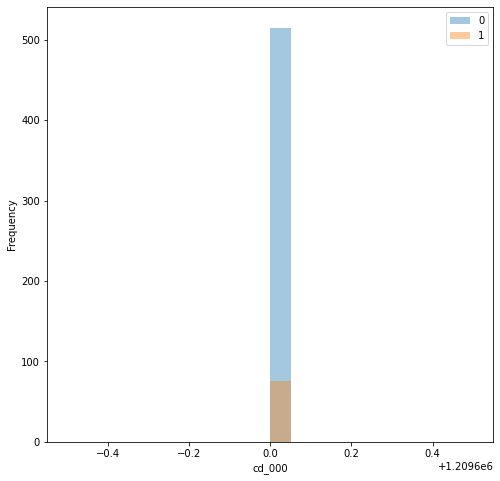

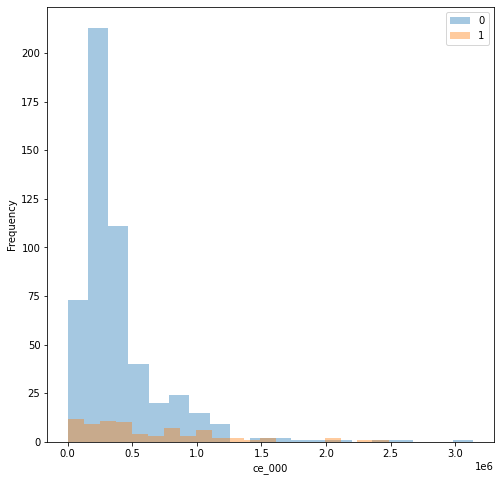

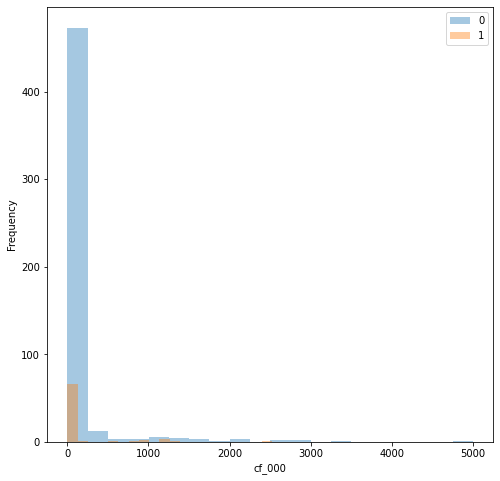

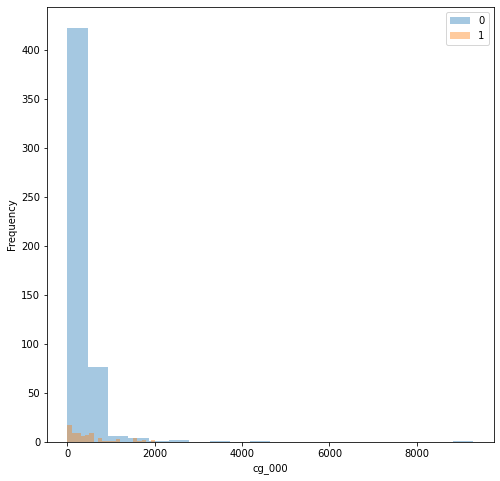

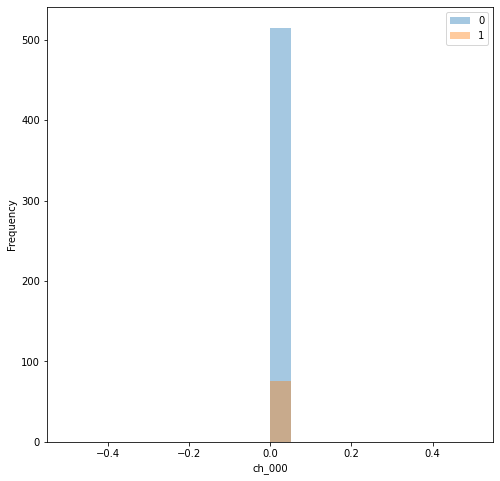

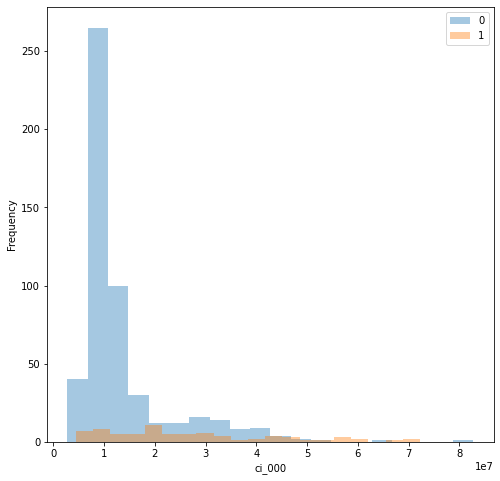

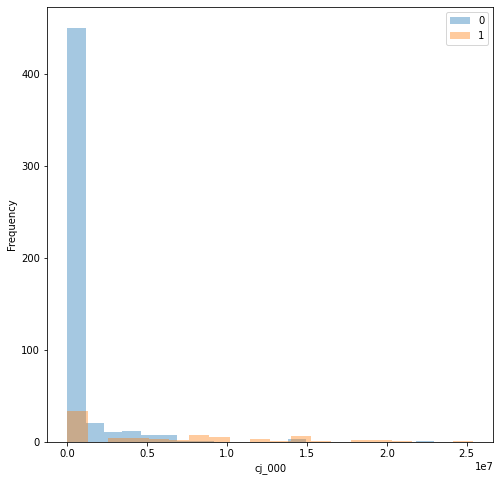

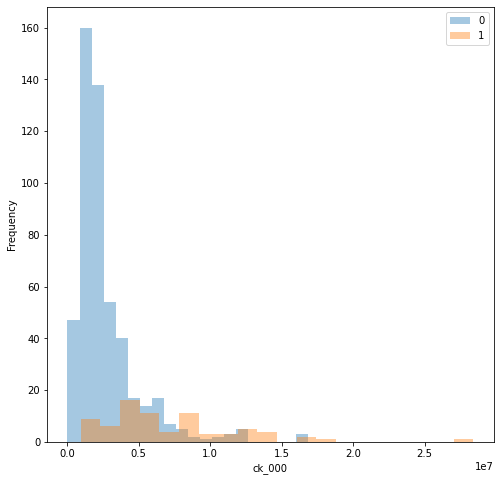

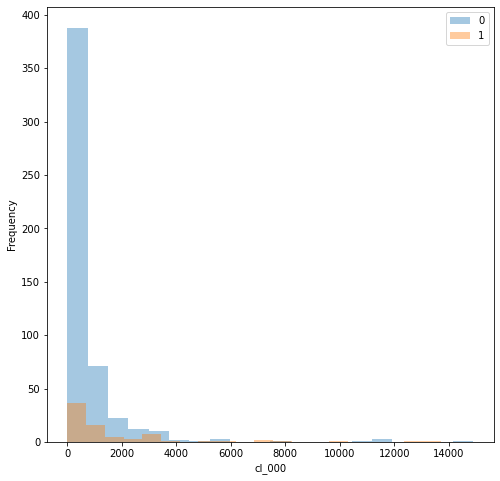

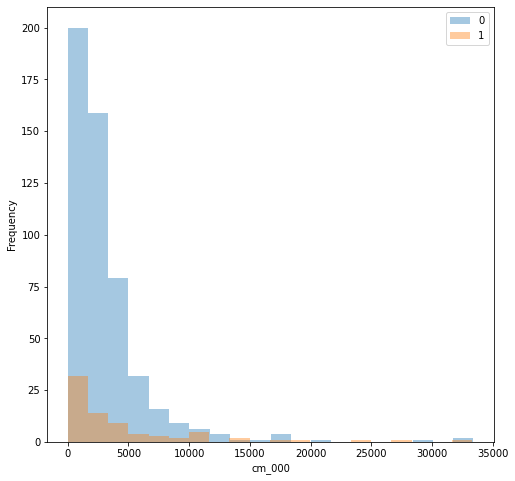

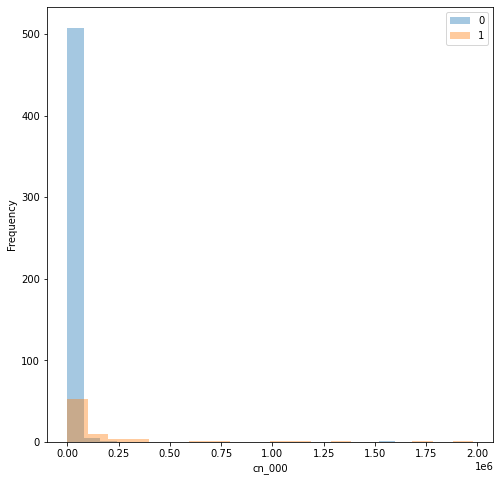

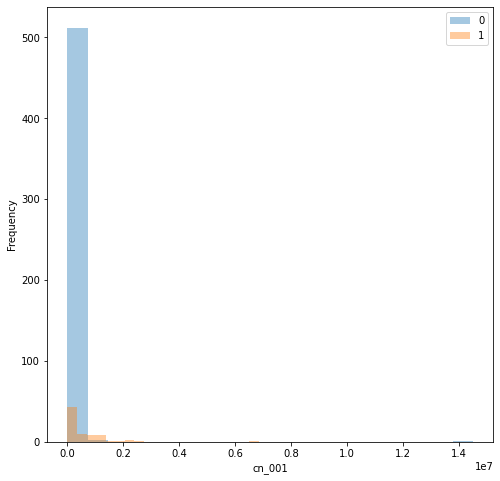

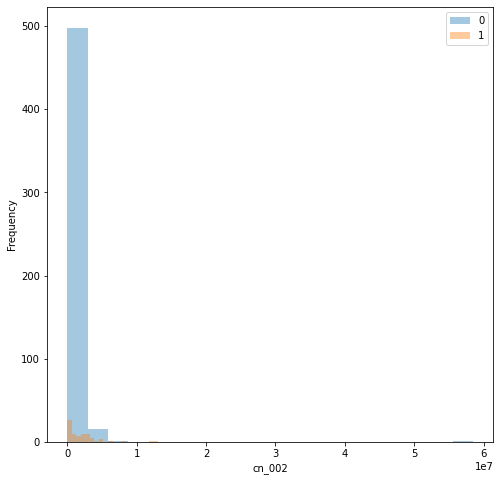

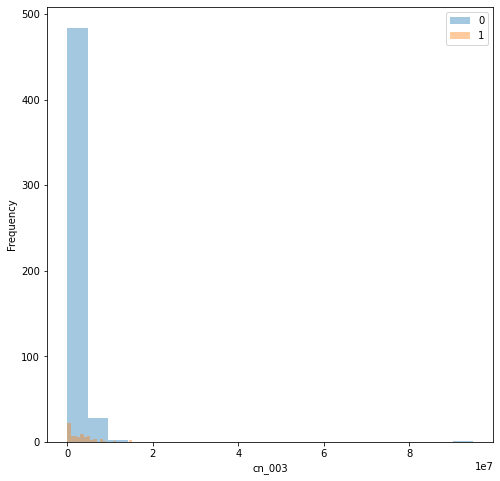

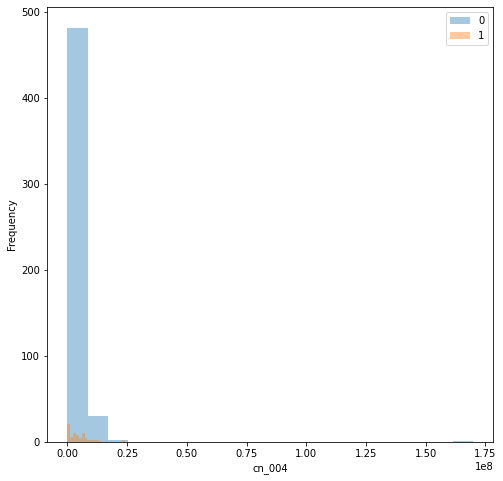

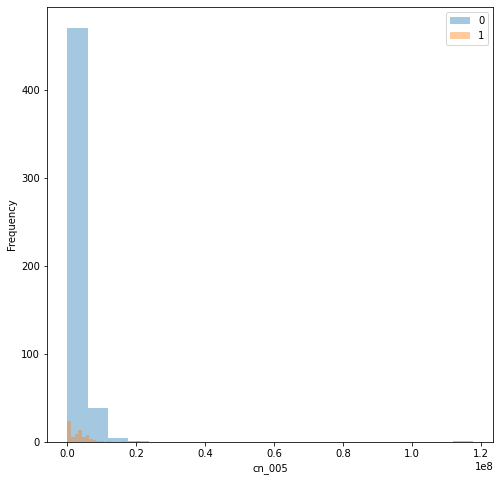

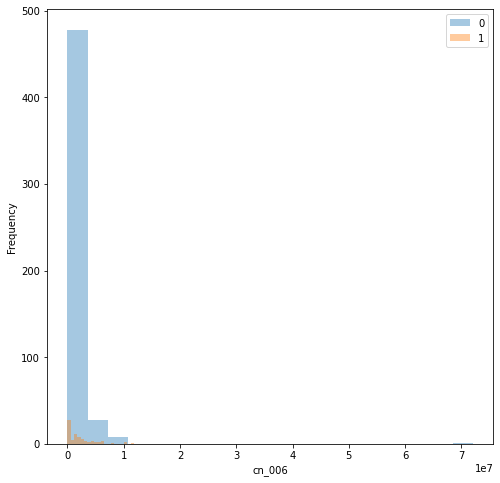

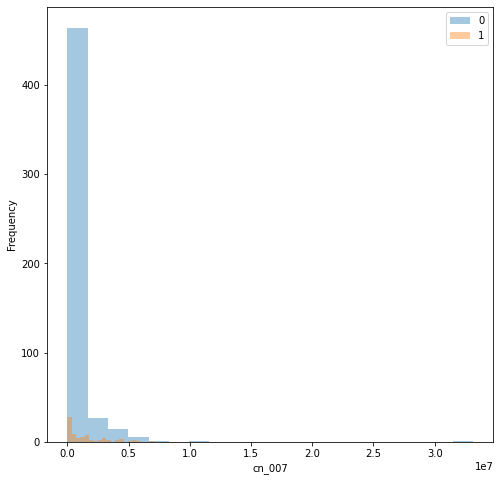

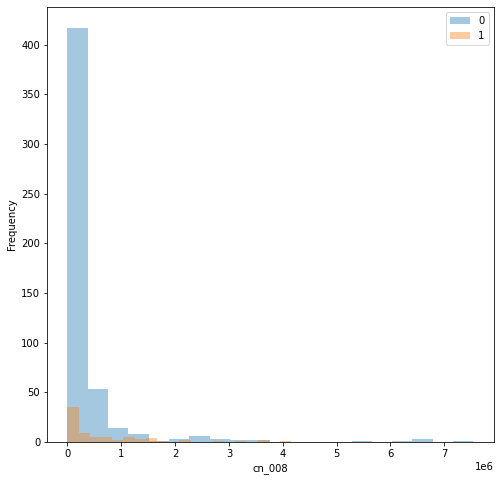

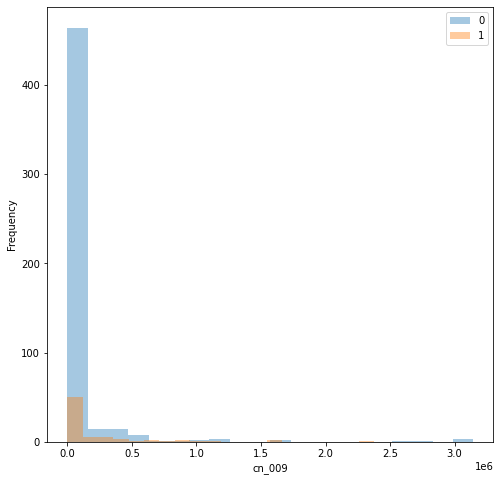

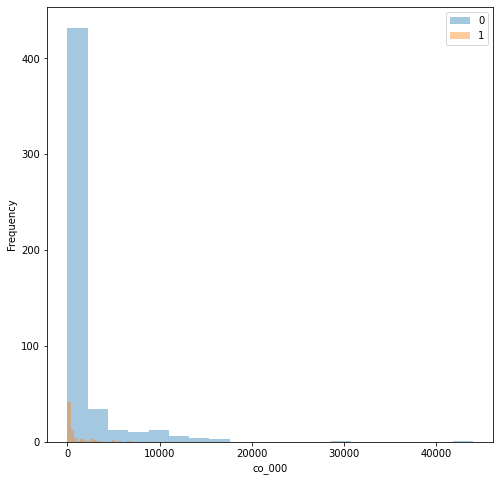

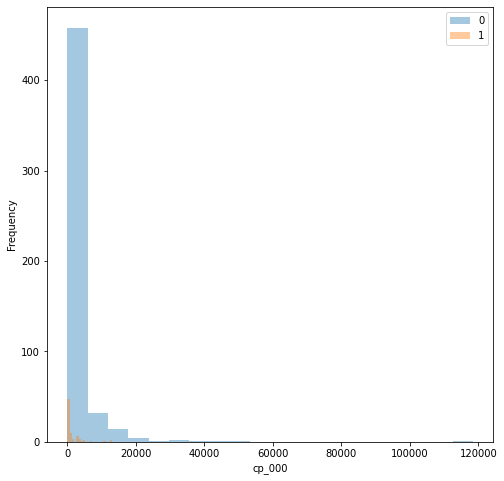

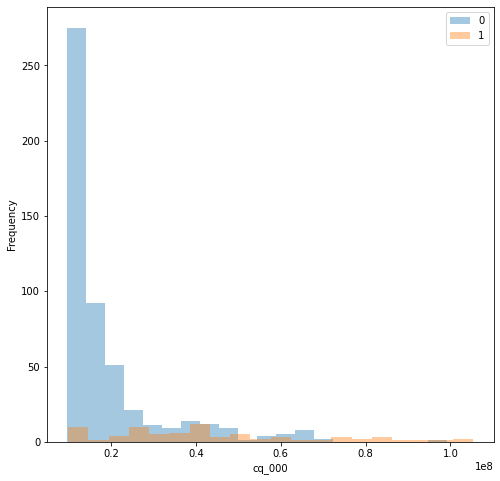

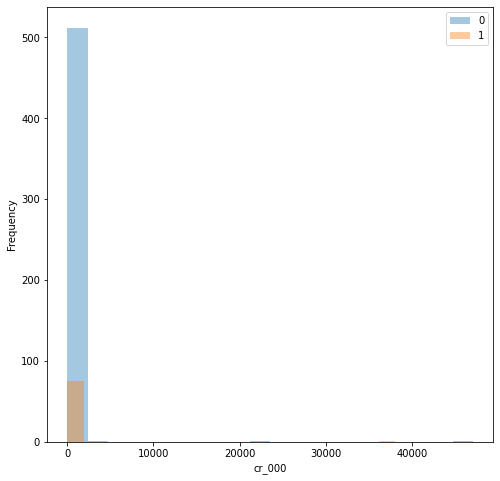

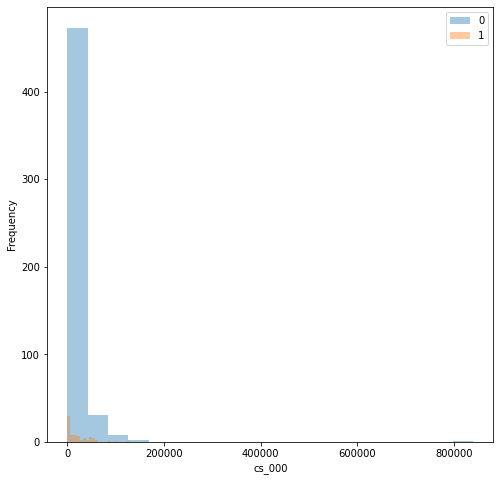

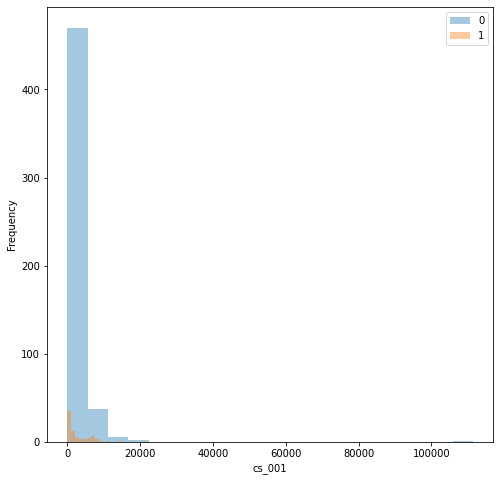

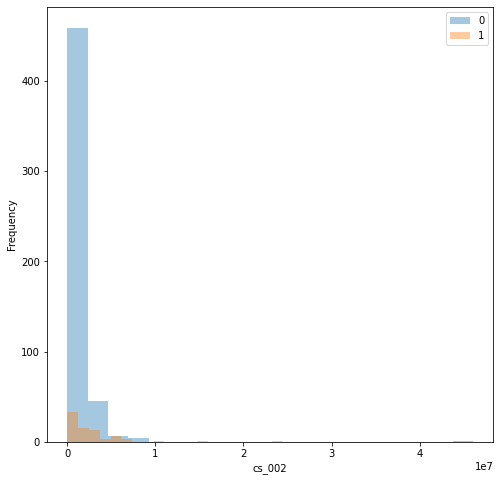

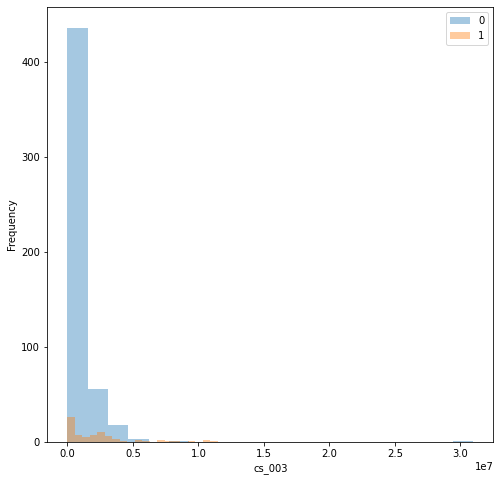

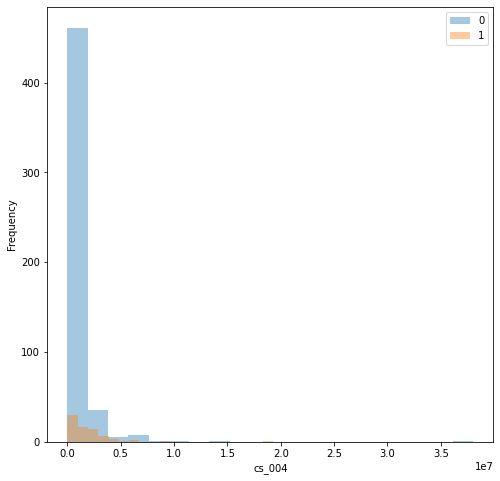

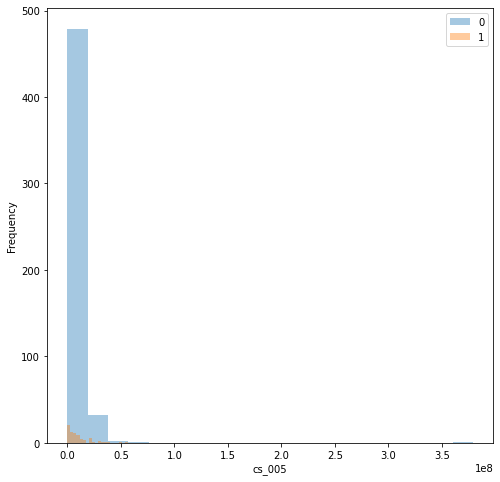

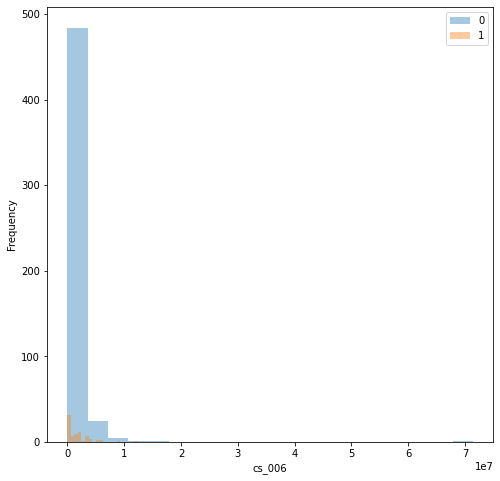

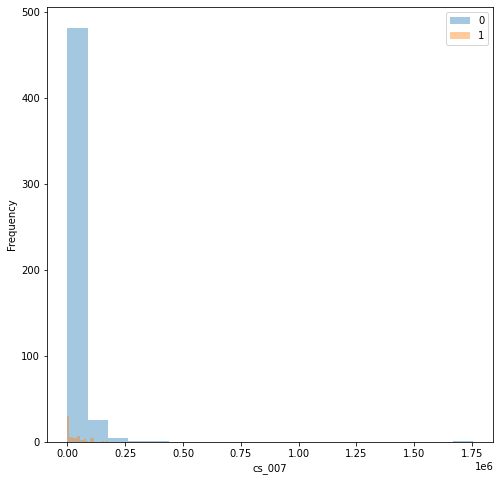

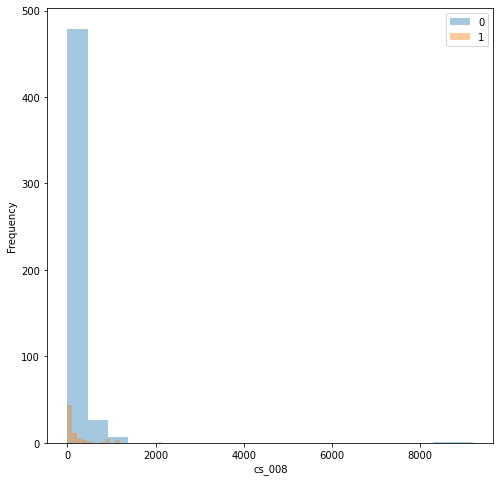

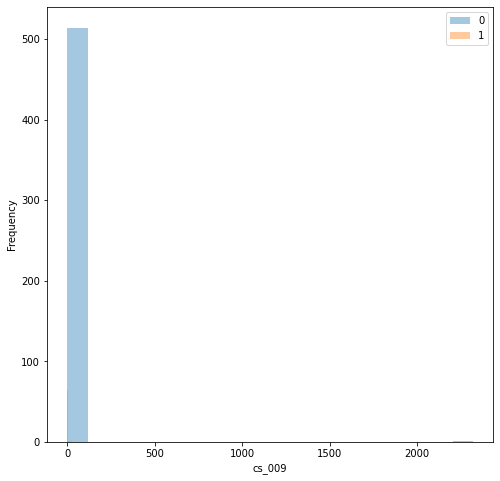

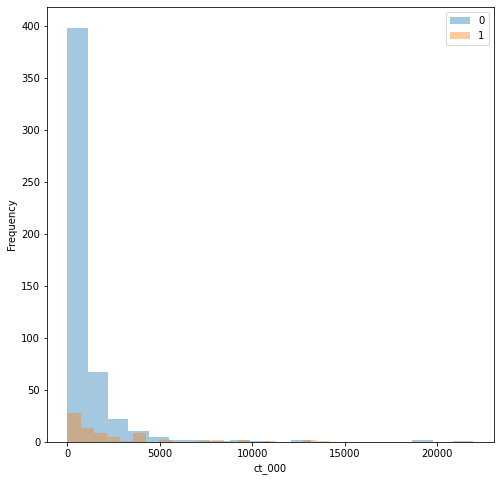

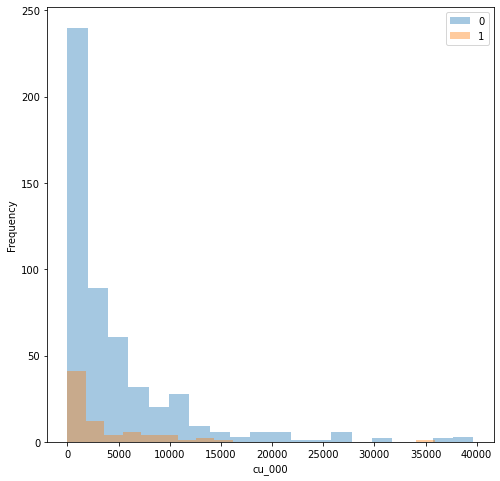

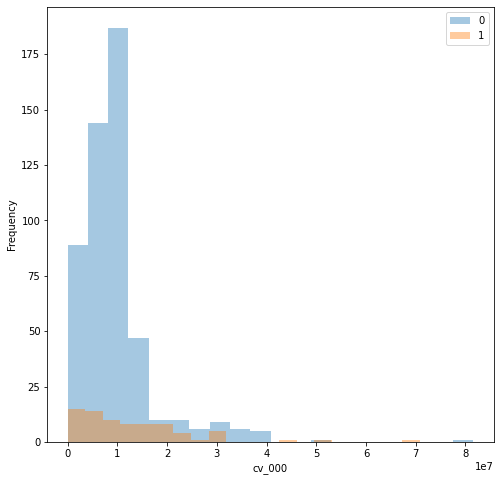

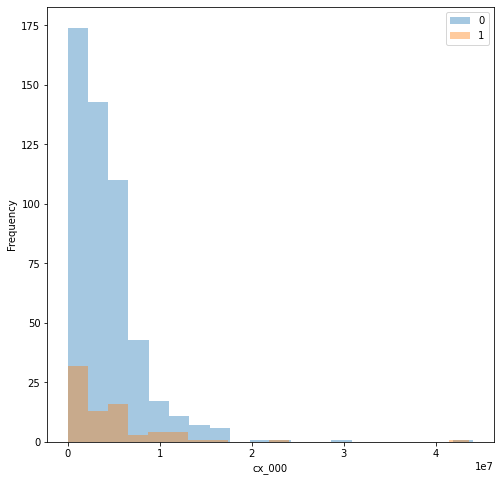

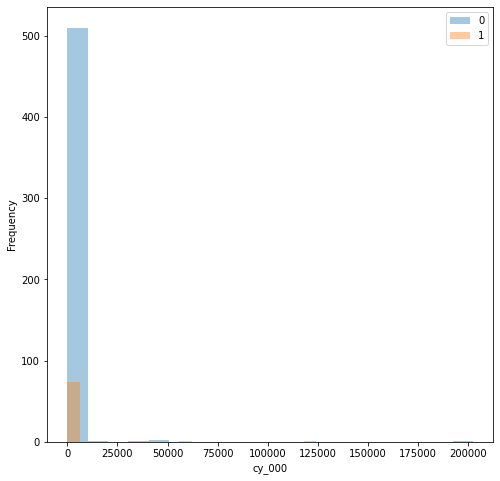

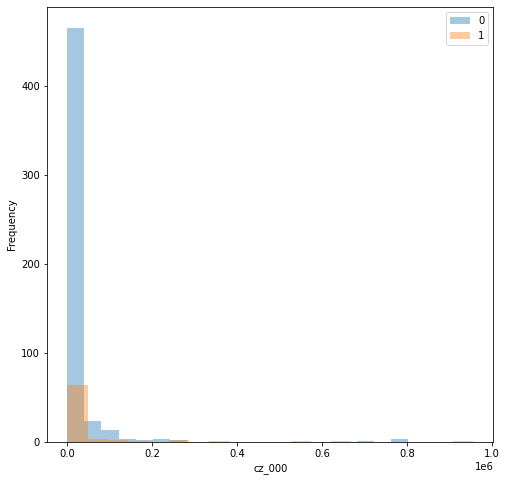

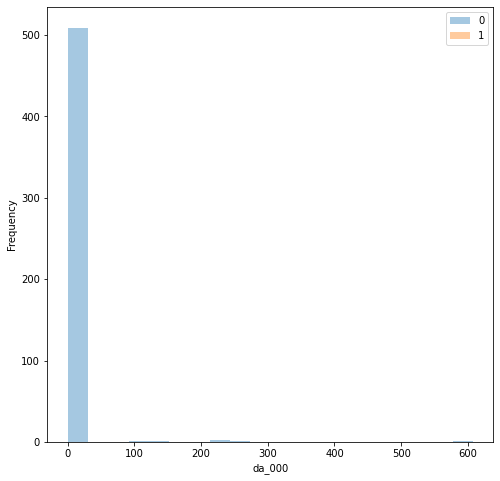

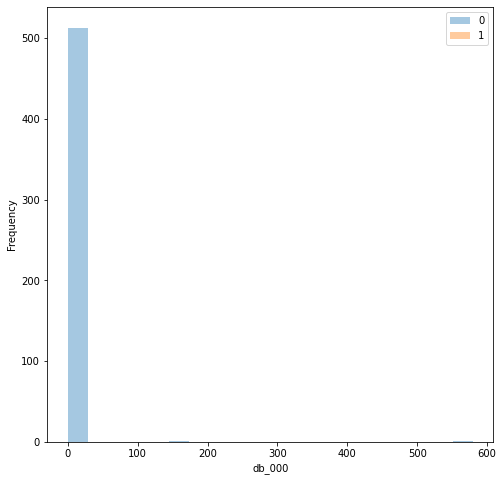

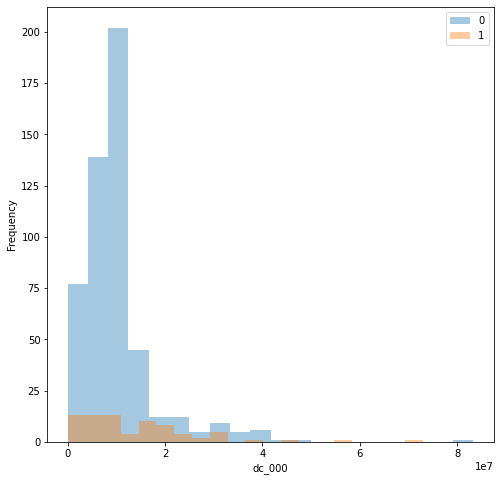

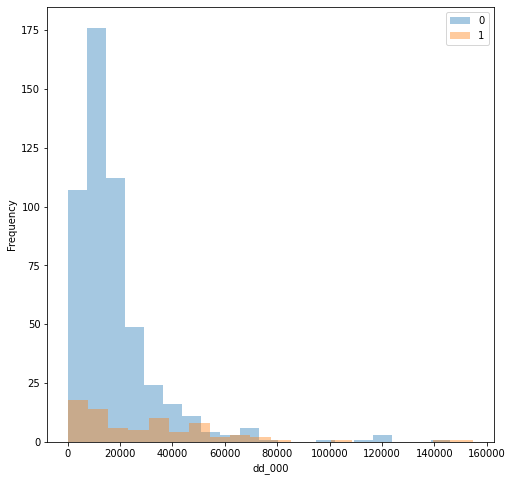

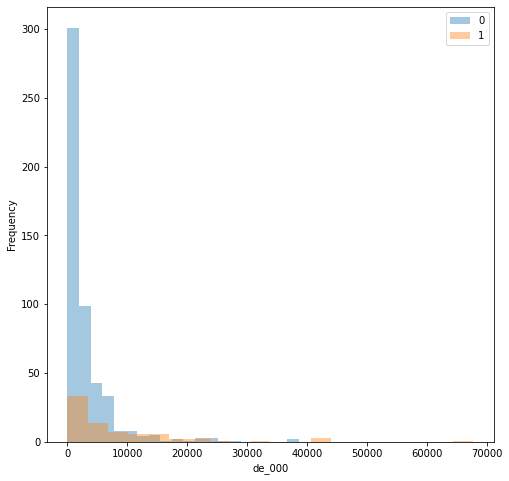

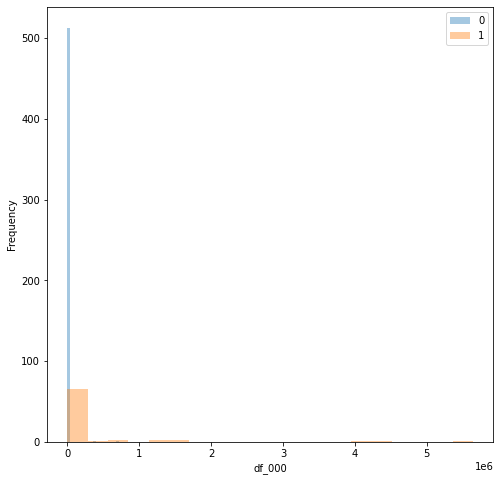

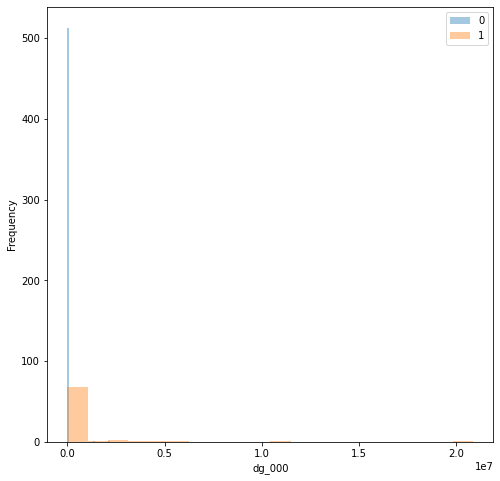

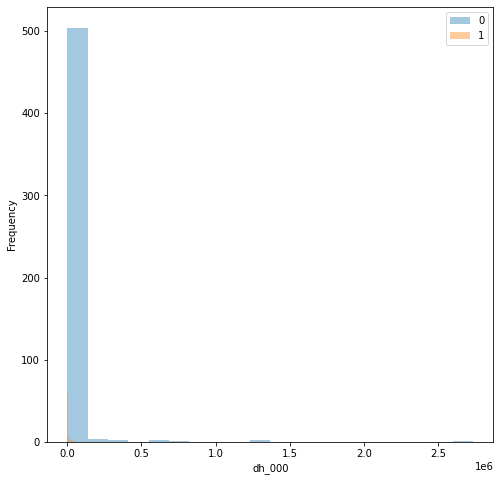

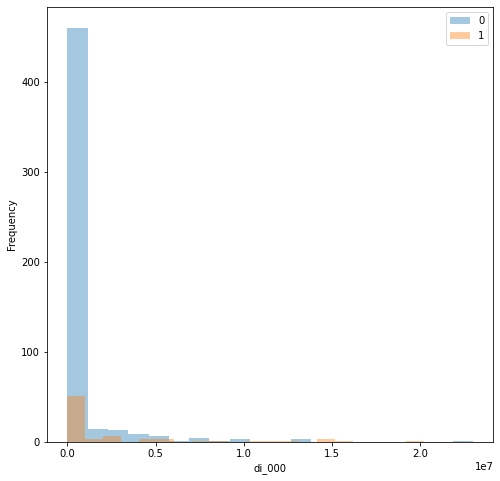

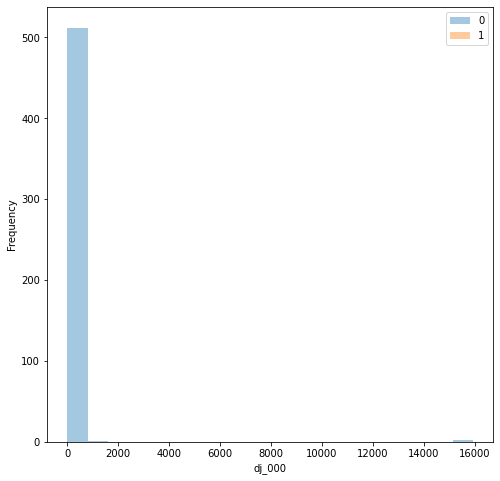

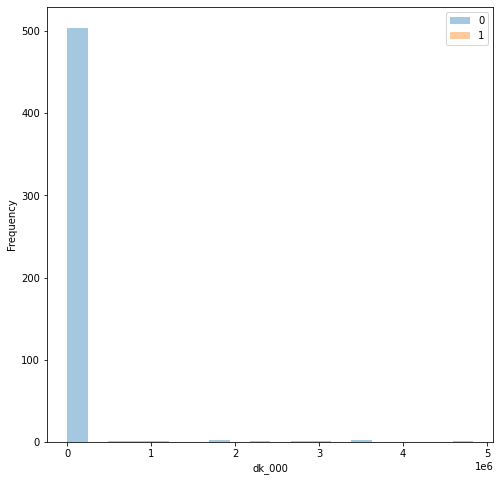

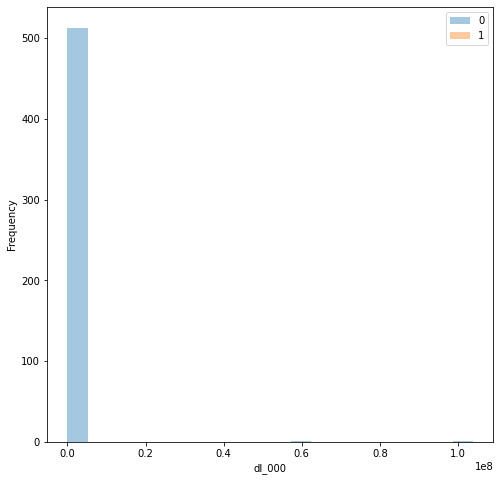

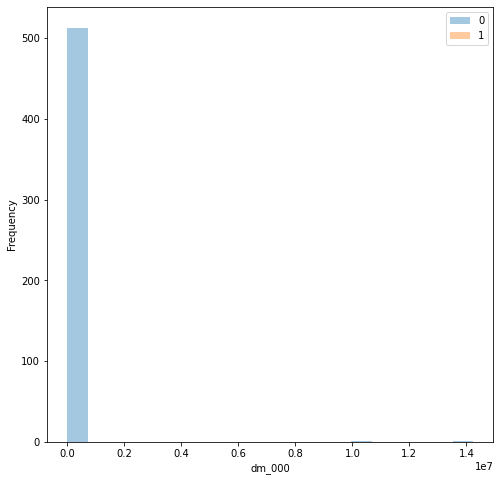

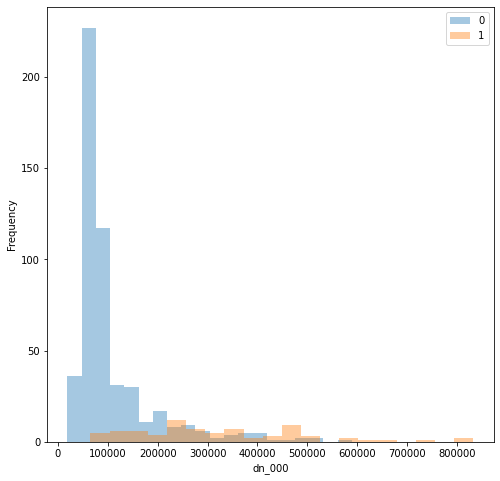

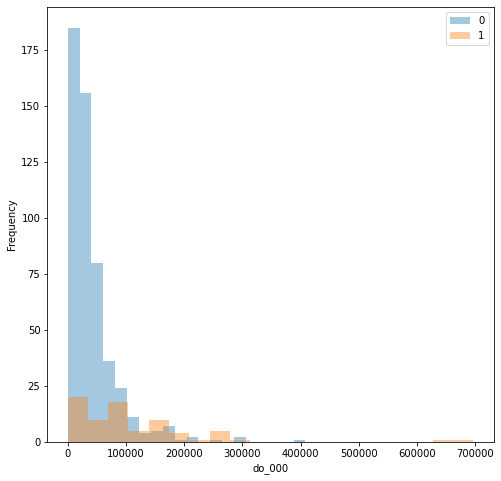

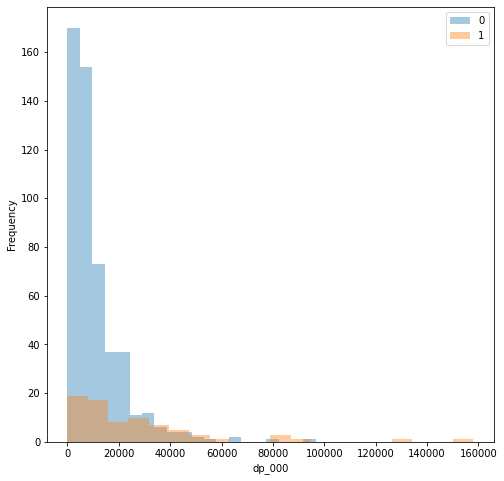

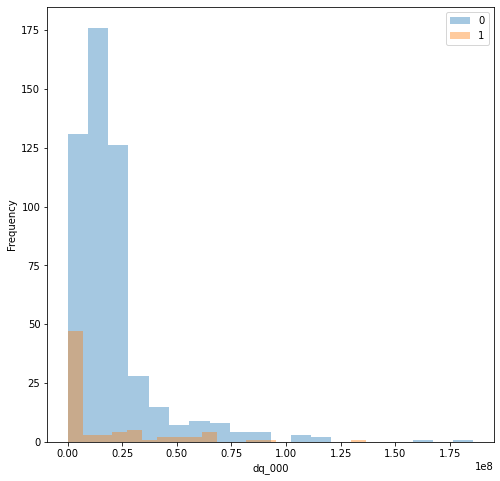

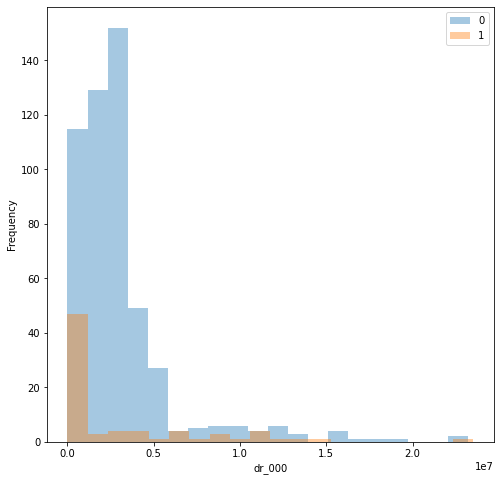

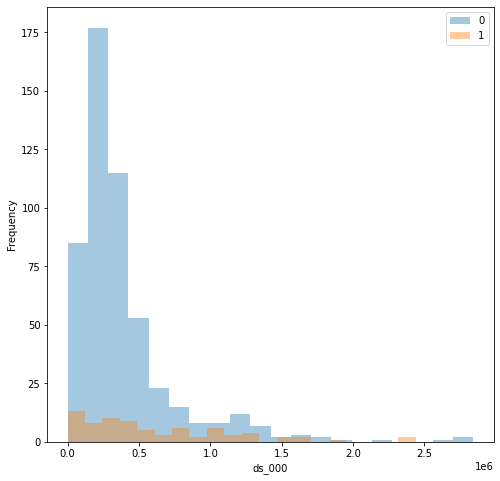

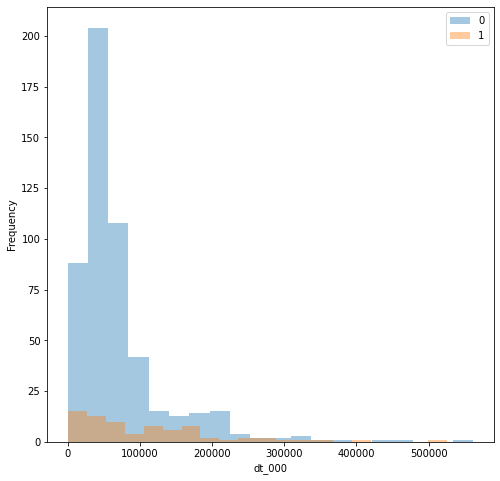

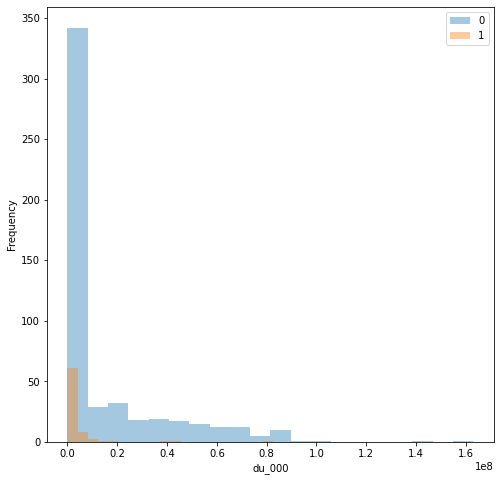

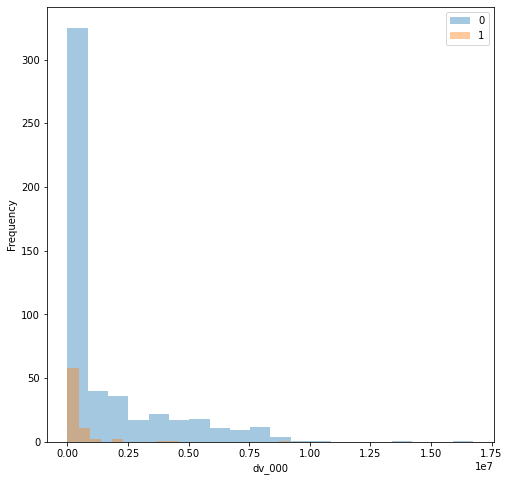

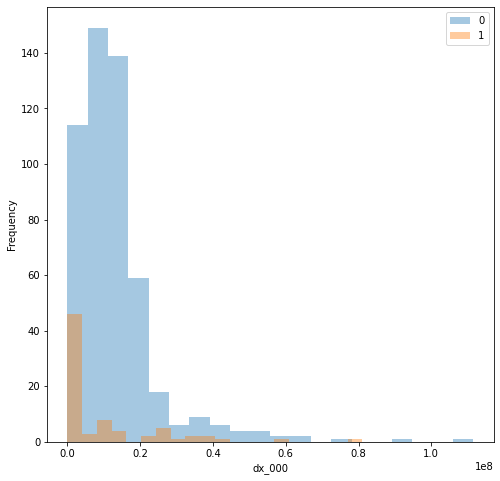

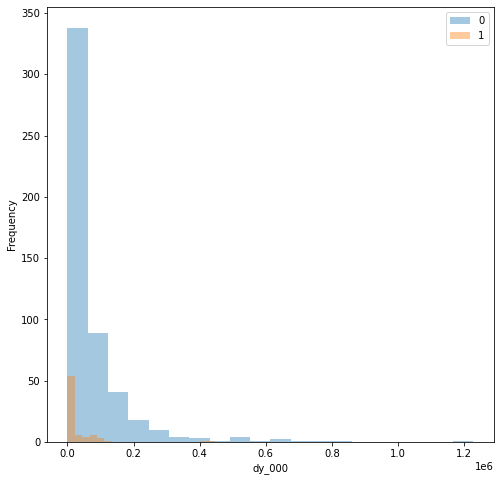

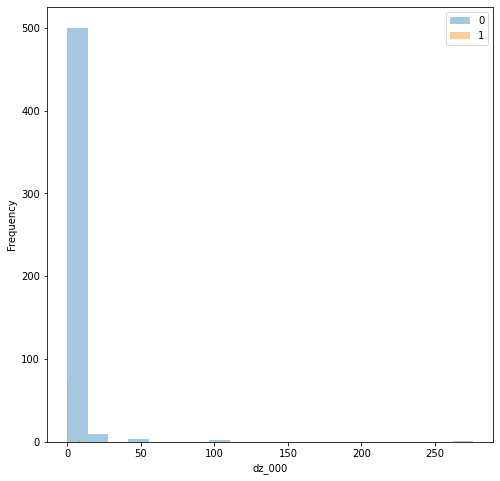

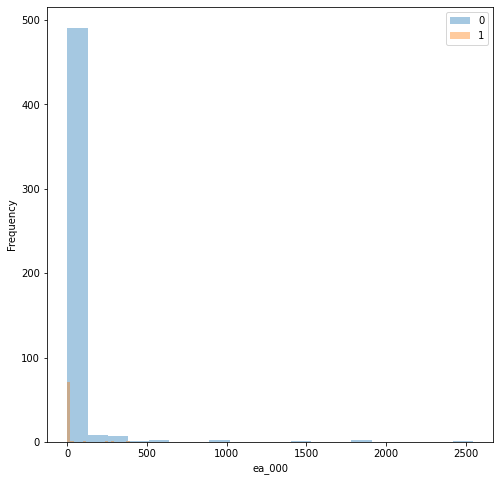

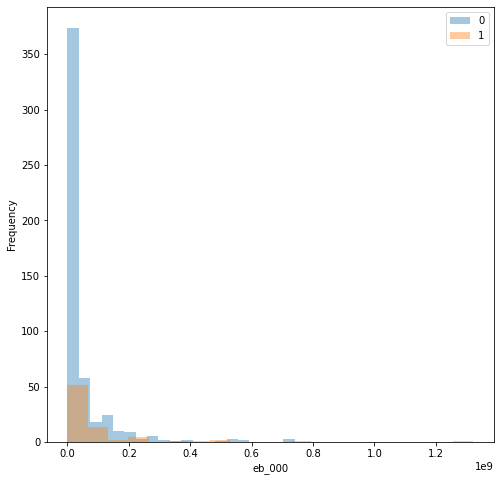

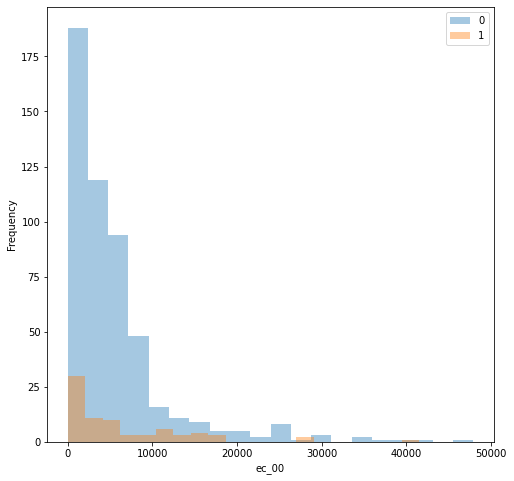

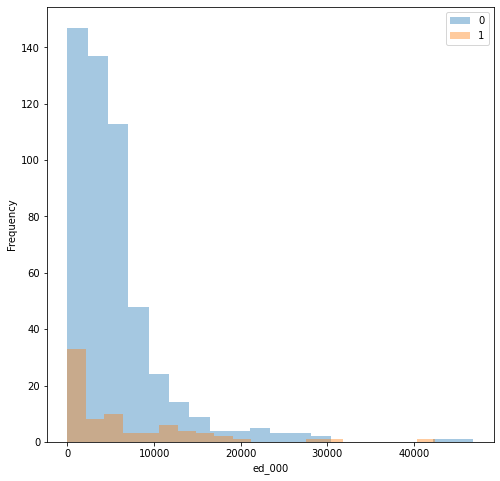

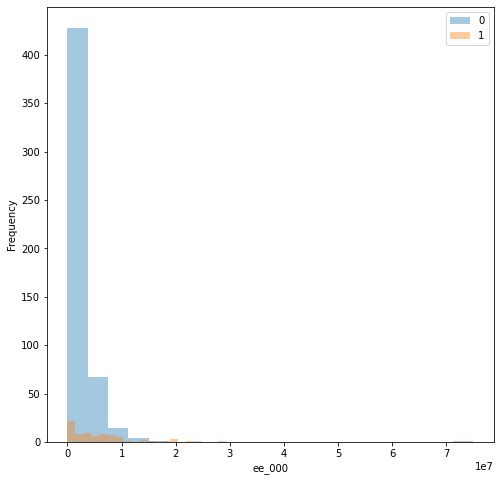

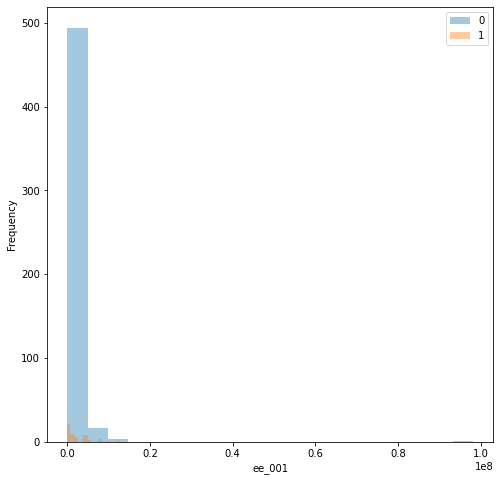

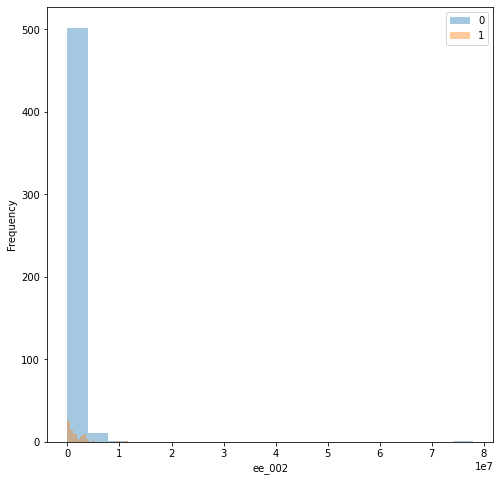

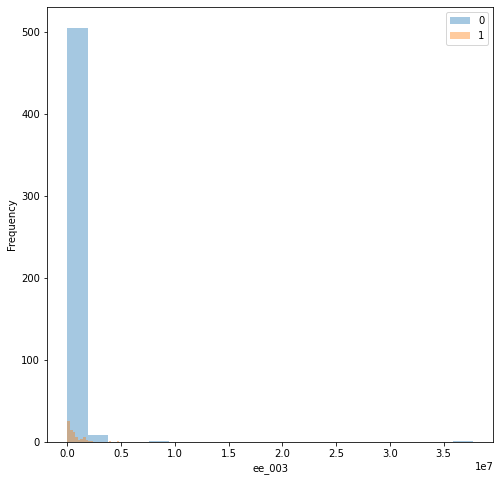

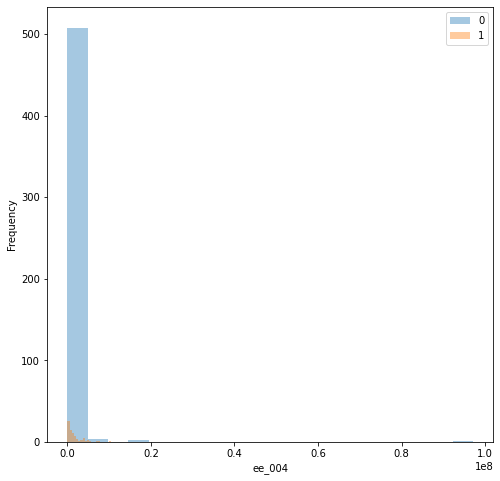

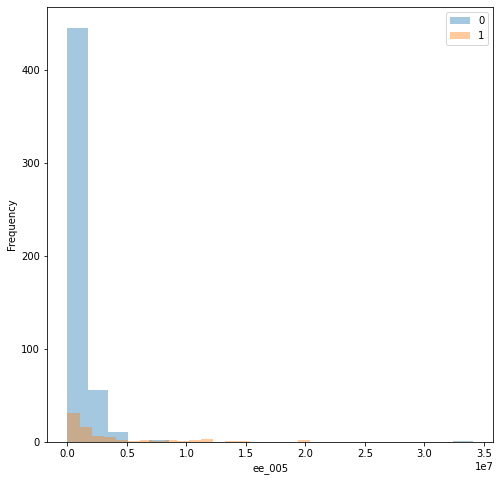

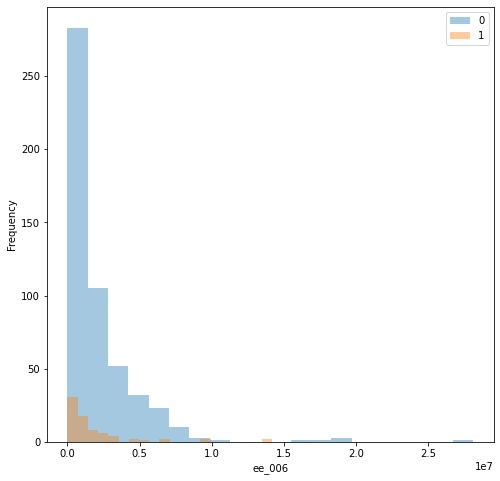

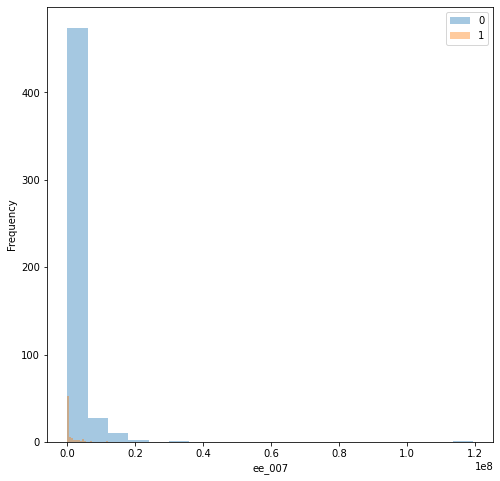

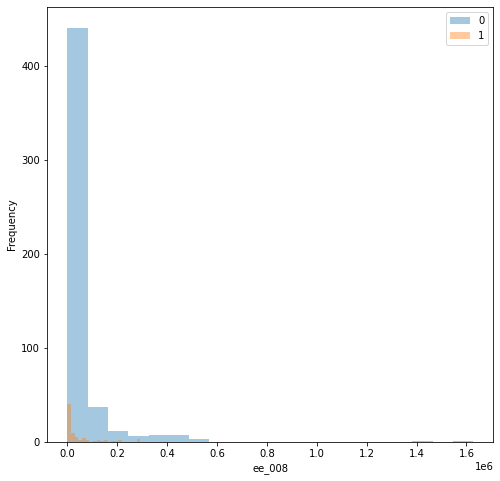

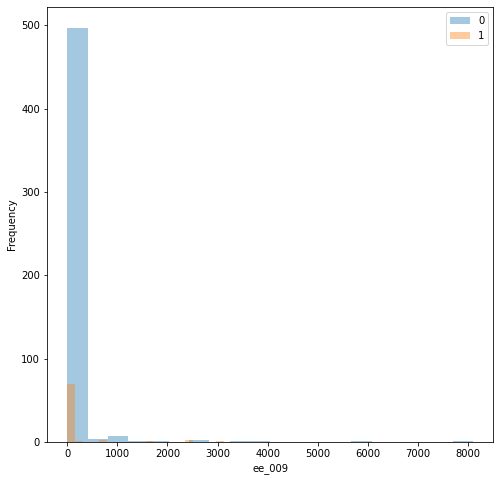

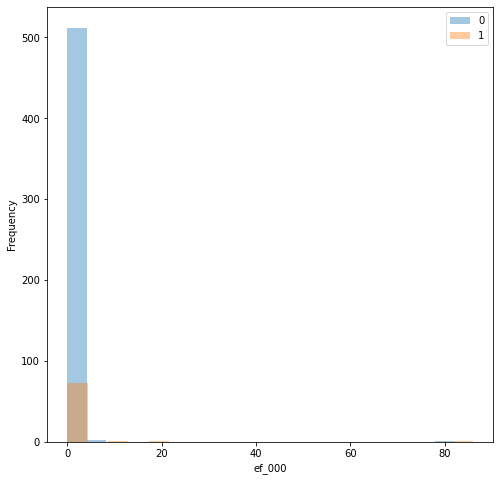

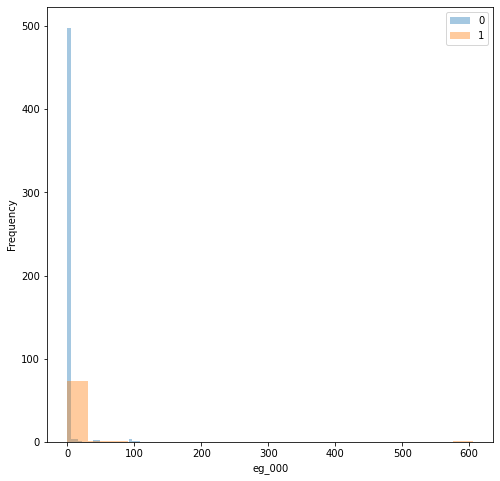

In [33]:
for col in data_wo_nan.select_dtypes('number').columns:
    group_area = data_wo_nan.groupby([target_variable])[col]
    group_area.plot(kind='hist', figsize=[8,8], alpha = .4, legend=True, bins=20)
    plt.xlabel(col)
    plt.show()

From the histograms above we see that train dataset with excluded NaNs has many attributes (ae000, ag000, ag001, ak000, ai000, at000, au000, ay000 etc.) that can be used to separate classes. That's why baseline model achieve good results after applying logistic regression.

In [34]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_nan)

Train_shape: (413, 170) Test shape: (178, 170)


In [35]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [36]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [37]:
quality_list_baseline = quality_report(pred, y_test)
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.961
Precision: 	 0.783
Recall: 	 0.900
f1_score: 	 0.837
ROC-AUC: 	 0.934



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.9,0.837,0.934


In [38]:
data_test.shape

(16000, 171)

In [39]:
X_test_file = pd.DataFrame(data_test.drop(columns=target_variable, axis=1).dropna())
print(X_test_file.shape)
y_test_file = data_test.dropna()[target_variable]
print(y_test_file.shape)

(165, 170)
(165,)


In [40]:
X_train_scaled, X_test_file_scaled = scale_data(X_train, X_test_file)

In [41]:
pred_file = model_LogR.predict(X_test_file_scaled)

In [42]:
quality_list_file_baseline = quality_report(pred_file, y_test_file)
df_quality.loc["baseline_file", :] = quality_list_file_baseline
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.945
Precision: 	 0.733
Recall: 	 0.957
f1_score: 	 0.830
ROC-AUC: 	 0.950



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950


We've got very high values of accuracy, recall and ROC-AUC. <br/>
High value of accuracy and recall caused by imbalanced dataset. High ROC-AUC of baseline model may be an indication of overfitting. However applying logistic regression to test file dataset confirms high ROC-AUC. <br/>
Let's test we have no overfitting by applying cross validation. As our current dataset without NaNs is rather small we won't have problem with it. 

<a id='Regression_CV'></a>

### Logistic Regression Model + cross validation

In [43]:
X = data_wo_nan.drop(columns=target_variable, axis=1)
y = data_wo_nan[target_variable]
model_LogR = LogisticRegression(solver="liblinear")
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_LogR, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.939


We confirmed that we get good results by applying logistic regression to initial dataset without NaNs. It's interesting whether we'd be able to improve our high training metrics.

The most significant training quality metrics are F1 and ROC-AUC. So let's watch how different feature transformation methods influence these metrics values.

<a id = 'Regression_weights'></a>

### Logistic Regression  with Class Weights

Sometimes cost-sensitive or weighted logistic regression improves quality for imbalanced datasets. <br/>
At first let's try to use `class_weight='balanced'` parameter value of LogisticRegression constructor. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.

In [44]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_nan)

Train_shape: (413, 170) Test shape: (178, 170)


In [45]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [46]:
model_LogR = LogisticRegression(solver="liblinear", class_weight='balanced')
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [47]:
quality_list_baseline = quality_report(pred, y_test)
df_quality.loc["baseline_class_weights_balanced", :] = quality_list_baseline
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.944
Precision: 	 0.870
Recall: 	 0.741
f1_score: 	 0.800
ROC-AUC: 	 0.860



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860


We have better precision and worser recall for model with balanced class weights. Due to f1 and ROC-AUC metrics training quality lowered.

We can also tune the class weights manually to find a better trade-off between false positives, false negatives and detected fraud cases. See [here](#http://www.kaggle.com/eikedehling/exploring-class-imbalance-resampling-and-weights). We'll search for parameters only in train part of dataset in order not to influence training results. 

C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best parameters : {'class_weight': {0: 0.28684210526315784, 1: 0.7131578947368422}}


C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


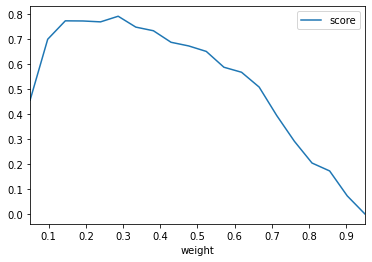

In [48]:
weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train_scaled, y_train)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [49]:
tuned_class_weights = grid_result.best_params_

In [50]:
tuned_class_weights

{'class_weight': {0: 0.28684210526315784, 1: 0.7131578947368422}}

In [51]:
lr = LogisticRegression(class_weight=tuned_class_weights['class_weight'])
lr.fit(X_train_scaled, y_train)
pred = lr.predict(X_test_scaled)
quality_list_baseline = quality_report(pred, y_test)
df_quality.loc["baseline_class_weights_tuned", :] = quality_list_baseline
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.944
Precision: 	 0.783
Recall: 	 0.783
f1_score: 	 0.783
ROC-AUC: 	 0.875



C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875


Tuned weights lowered precision but increased recall. F1 value lowered, ROC-AUC increased. Nevertheless tuning parameters didn't improve model as compared with baseline model. 

We have сost-metric of misclassification given in dataset description. <br>
Predicted class | True class |<br>
    | pos | neg | <br/>

pos | - | Cost_1 |<br/>

neg | Cost_2 | - | <br/>

Cost_1 = 10 and cost_2 = 500

The total cost of a prediction model the sum of 'Cost_1'multiplied by the number of Instances with type 1 failure
and 'Cost_2' with the number of instances with type 2 failure, resulting in a 'Total_cost'.<br>
Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.


In [52]:
model_LogR = LogisticRegression(solver="liblinear", class_weight={0:10, 1:500})
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [53]:
quality_list_baseline = quality_report(pred, y_test)
df_quality.loc["baseline_class_weights_given", :] = quality_list_baseline
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.944
Precision: 	 0.957
Recall: 	 0.710
f1_score: 	 0.815
ROC-AUC: 	 0.851



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851


Training quality is still lower than baseline model's.

<a id='Logistic_Without_Correlation'></a>

### Logistic Regression Model without Correlation

In [54]:
corr_matrix = data.corr()

In [55]:
# iterate over columns only in the lower triangular matrix of correlation matrix
most_correlated = []
j = 1
for i in np.arange(corr_matrix.shape[0]):
    for k in np.arange(j, corr_matrix.shape[1]):
        if corr_matrix.iat[k,i] > 0.85:
            # write to most_correlated array correlated features pairs
            most_correlated.append([corr_matrix.columns.values[k], corr_matrix.index.values[i]])
            print(k, corr_matrix.columns.values[k], i,corr_matrix.index.values[i], corr_matrix.iat[k, i])
    j += 1

17 ah_000 1 aa_000 0.9081034271246899
23 an_000 1 aa_000 0.915272629823219
24 ao_000 1 aa_000 0.9203016501610503
63 bb_000 1 aa_000 0.9148403964779954
68 bg_000 1 aa_000 0.9078842247487955
81 bt_000 1 aa_000 0.9999999999921241
82 bu_000 1 aa_000 0.9146241248980299
83 bv_000 1 aa_000 0.9146240830131637
84 bx_000 1 aa_000 0.8500649813757791
95 ci_000 1 aa_000 0.9653458590664309
112 cq_000 1 aa_000 0.9146241061943918
92 cf_000 4 ad_000 0.9999999966220899
110 co_000 4 ad_000 0.9999999945280076
101 cn_001 9 ag_002 0.8617194858113366
11 ag_004 10 ag_003 0.8737260001942174
101 cn_001 10 ag_003 0.8967147786163665
102 cn_002 10 ag_003 0.8988083566480077
102 cn_002 11 ag_004 0.8892141424704034
103 cn_003 11 ag_004 0.8872208679582643
48 az_005 12 ag_005 0.8759839450379695
54 ba_001 12 ag_005 0.905635198139427
55 ba_002 12 ag_005 0.9016392657603943
56 ba_003 12 ag_005 0.8941395661871634
57 ba_004 12 ag_005 0.8610837071128586
84 bx_000 12 ag_005 0.8757660363012475
89 cc_000 12 ag_005 0.873983477389

In [56]:
# let's fill params_to_drop with correlated attributes names
params_to_drop = []
for pair in most_correlated:
    print('Correlation coefficient between', pair[0], 'and', pair[1], 'is equal to', corr_matrix.at[pair[0], pair[1]])
    if (pair[0] in params_to_drop) or (pair[1] in params_to_drop):
        continue
    params_to_drop.append(pair[1])
len(params_to_drop)

Correlation coefficient between ah_000 and aa_000 is equal to 0.9081034271246899
Correlation coefficient between an_000 and aa_000 is equal to 0.915272629823219
Correlation coefficient between ao_000 and aa_000 is equal to 0.9203016501610503
Correlation coefficient between bb_000 and aa_000 is equal to 0.9148403964779954
Correlation coefficient between bg_000 and aa_000 is equal to 0.9078842247487955
Correlation coefficient between bt_000 and aa_000 is equal to 0.9999999999921241
Correlation coefficient between bu_000 and aa_000 is equal to 0.9146241248980299
Correlation coefficient between bv_000 and aa_000 is equal to 0.9146240830131637
Correlation coefficient between bx_000 and aa_000 is equal to 0.8500649813757791
Correlation coefficient between ci_000 and aa_000 is equal to 0.9653458590664309
Correlation coefficient between cq_000 and aa_000 is equal to 0.9146241061943918
Correlation coefficient between cf_000 and ad_000 is equal to 0.9999999966220899
Correlation coefficient betwe

Correlation coefficient between dt_000 and ds_000 is equal to 0.9694481800592442
Correlation coefficient between ed_000 and ec_00 is equal to 0.9568639475864638
Correlation coefficient between ee_003 and ee_002 is equal to 0.9462309151233197
Correlation coefficient between ee_004 and ee_002 is equal to 0.8854327401104524
Correlation coefficient between ee_004 and ee_003 is equal to 0.9558824326277943


58

In [57]:
data_wo_corr = data.drop(columns=params_to_drop, axis=1)
data_wo_corr.shape

(60000, 113)

In [58]:
data_wo_corr.columns

Index(['class', 'ab_000', 'ac_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_008', 'ag_009', 'ai_000',
       ...
       'ee_000', 'ee_001', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'], dtype='object', length=113)

In [59]:
data.shape, data_wo_corr.shape

((60000, 171), (60000, 113))

Let's exclude correlated features from test dataset to measure quality.

In [60]:
data_test_file_wo_corr = data_test.drop(columns=params_to_drop, axis=1)
data_test_file_wo_corr.shape

(16000, 113)

In [61]:
prct_missing = (data.isna().sum() / data.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class      0.00
aa_000     0.00
ab_000    77.22
ac_000     5.56
ad_000    24.77
dtype: float64

Features with more then 40% NaNs: 9/171


In [62]:
prct_missing = (data_wo_corr.isna().sum() / data_wo_corr.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class      0.00
ab_000    77.22
ac_000     5.56
ae_000     4.17
af_000     4.17
dtype: float64

Features with more then 40% NaNs: 3/113


Excluding correlated features decreased number of features with huge count of NaNs in the train dataset.

In [63]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr.dropna())
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_wo_corr_wo_nan", verbose=False)

df_quality
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_wo_corr_wo_nan_tuned_weights", 
                                      verbose=False, class_weight=tuned_class_weights['class_weight'])

df_quality

Train_shape: (534, 112) Test shape: (230, 112)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933


***F1 value is better than for baseline model, ROC-AUC is almost the same. This is the best result achieved. ***

In [64]:
params = params_to_drop.copy()
params.append(target_variable)
X_test_file = pd.DataFrame(data_test.drop(columns=params).dropna())
y_test_file = data_test.drop(columns=params_to_drop).dropna()[target_variable]
print (X_train.shape, y_train.shape, X_test_file.shape, y_test_file.shape)
X_train_scaled, X_test_file_scaled = scale_data(X_train, X_test_file)
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_file_scaled , y_train, y_test_file ,
                                     df_quality, exp_name="data_wo_corr_wo_nan_tuned_weights_file", 
                                      verbose=False, class_weight=tuned_class_weights['class_weight'])

df_quality

(534, 112) (534,) (212, 112) (212,)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939


Test file model quality is slightly worse than for baseline model on test file.<br>

Let's visualize number of NaNs in examined datasets.

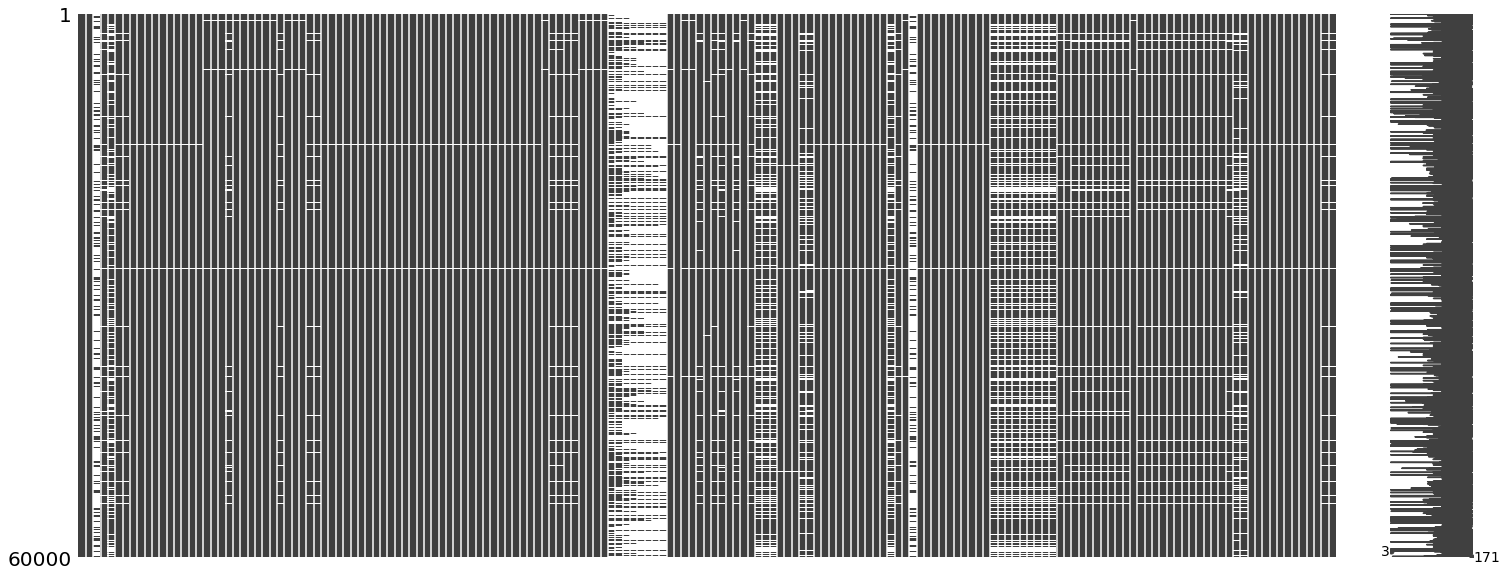

In [65]:
msno.matrix(data)

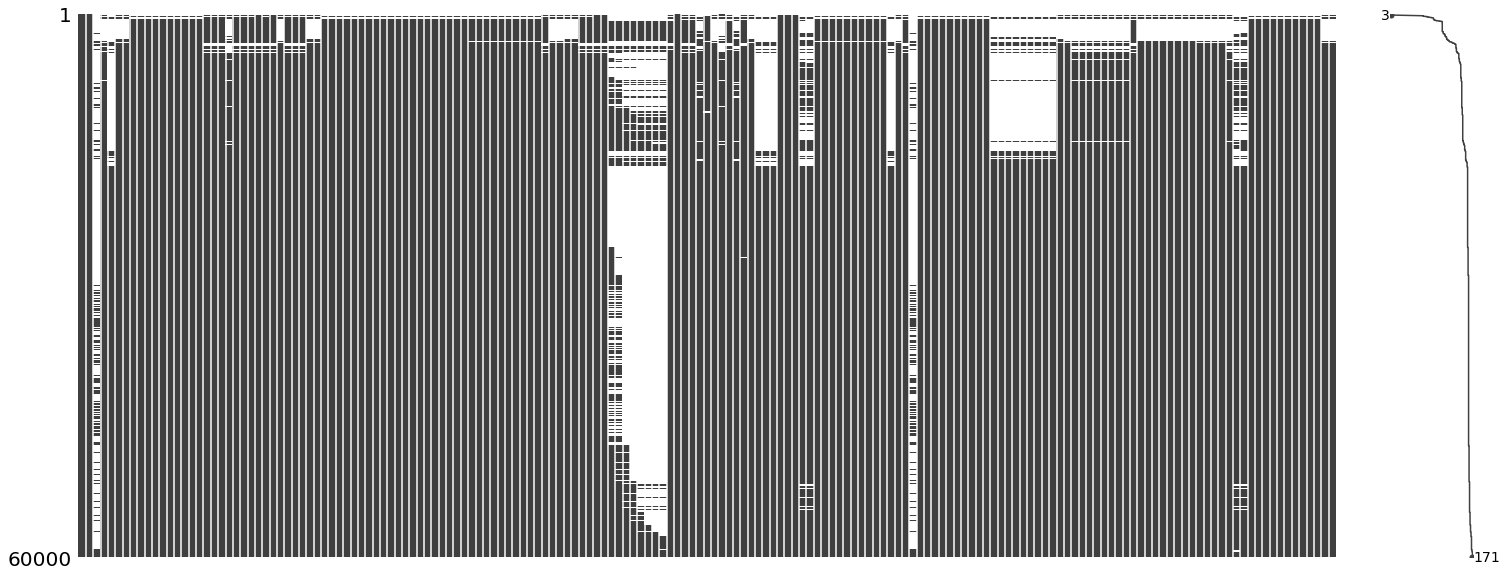

In [66]:
msno.matrix(data, sort='ascending')

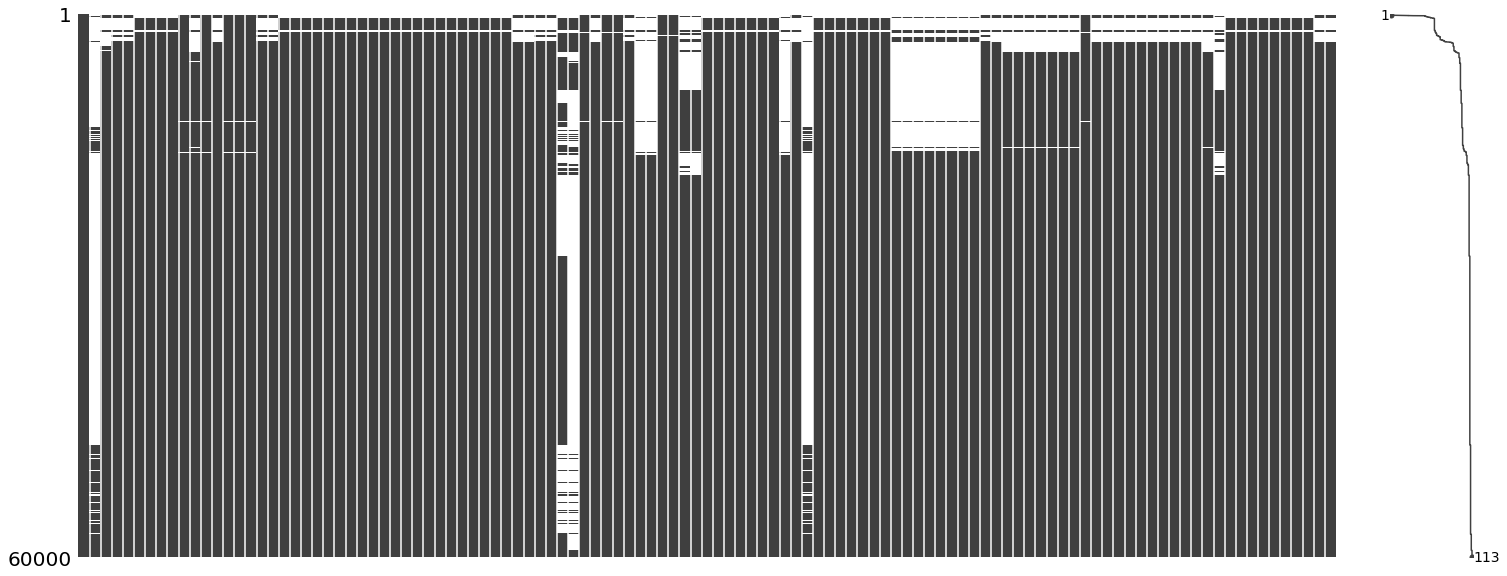

In [67]:
msno.matrix(data_wo_corr, sort='ascending')

<a id='Logistic_With_Imputation'></a>

### Logistic Regression Model with Imputation

Due to our dataset description function results, mode imputation seems to be the most reasonable.

In [68]:
data_wo_corr_fillna = fill_NA(data_wo_corr, strategy='mode', NA_cols=data_wo_corr.columns[1:])
data_wo_corr_fillna.shape

(60000, 113)

In [69]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr_fillna)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_wo_corr_fill_nan_tuned_weights", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 112) Test shape: (18000, 112)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794


In [70]:
data_test_file_fillna = data_wo_corr_fillna.dropna()
data_test_file_fillna.shape
y_test_file_fillna = data_test_file_fillna[target_variable]

In [71]:
X_train_scaled, X_test_file_scaled = scale_data(X_train, data_test_file_fillna.drop(columns=target_variable, axis=1))

df_quality = assess_data_wo_splitting(X_train_scaled, X_test_file_scaled, y_train, y_test_file_fillna,
                                     df_quality, exp_name="data_wo_corr_fill_nan_tuned_weights_file", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


**Mode imputation decreases quality metrics values.**

Let's try median imputation just for fun.

In [72]:
data_wo_corr_fillna_median = fill_NA(data_wo_corr, strategy='median', NA_cols=data_wo_corr.columns[1:])
data_wo_corr_fillna_median.shape

(60000, 113)

In [73]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr_fillna_median)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_wo_corr_fill_nan_median_tuned_weights", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 112) Test shape: (18000, 112)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [74]:
data_wo_corr_fillna_zero = data_wo_corr.fillna(0)
data_wo_corr_fillna_zero.shape

(60000, 113)

In [75]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_wo_corr_fill_nan_zero_tuned_weights", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 112) Test shape: (18000, 112)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Mode imputation quality metrics values (f1: 0.580, roc: 0.794). <br>
Median imputation (f1: 0.585, roc: 0.791)<br>
Zero imputation (f1: 0.592, roc: 0.792)<br>

**Zero imputation seems to be the best.** Let's test zero imputation model via test datafile.

In [76]:
data_test_file_fillna_zero = data_wo_corr_fillna_zero.dropna()
y_test_file_fillna_zero = data_test_file_fillna_zero[target_variable]
data_test_file_fillna_zero.shape
X_train_scaled, X_test_file_scaled = scale_data(X_train, data_test_file_fillna_zero.drop(columns=target_variable, axis=1))


df_quality = assess_data_wo_splitting(X_train_scaled, X_test_file_scaled, y_train, y_test_file_fillna_zero,
                                     df_quality, exp_name="data_wo_corr_fill_nan_zero_tuned_weights_file", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Zero imputation model run on test datafile gives us slightly worse result (f1:0.578, roc:0.802) than mode imputation model (f1:0.580, roc:0.811). Let's use zero imputation further (on previous runs zero imputation performed a little bit better).

#### Logistic Regression With Imputation. Correlation exists. 

In [77]:
data_fillna_zero = data.fillna(0)
data_fillna_zero.shape

(60000, 171)

In [78]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="data_fill_nan_zero_tuned_weights", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 170) Test shape: (18000, 170)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [79]:
data_test_file_fillna_zero = data_test.fillna(0)
data_test_file_fillna_zero.shape
y_test_file_fillna_zero = data_test_file_fillna_zero[target_variable]

In [80]:
X_train_scaled, X_test_file_scaled = scale_data(X_train, data_test_file_fillna_zero.drop(columns=target_variable, axis=1))

df_quality = assess_data_wo_splitting(X_train_scaled, X_test_file_scaled, y_train, y_test_file_fillna_zero,
                                     df_quality, exp_name="data_fill_nan_zero_tuned_weights_file", verbose=False,
                                    class_weight=tuned_class_weights['class_weight'])
df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


It's interesting that excluding correlated features decreases model quality. Last two rows correspond to dataset with correlated features. Their quality is higher than for dataset with excluded correlated features (3rd and 4th row from the bottom).

<a id = 'Logistic_With_Regularization'></a>

### Logistic Regression Model with Regularization

Let's find `5` and `10` most important features via L1 regularization.

In [81]:
data_sample_balanced = get_balanced_sample(data_fillna_zero, n = 1000)

In [82]:
print(data_fillna_zero.shape, data_test_file_fillna_zero.shape)

(60000, 171) (16000, 171)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_sample_balanced.drop(labels=[target_variable], axis=1),                                                    
     data_sample_balanced[target_variable],
     test_size=0.01,
     stratify=data_sample_balanced[target_variable],
     random_state=0)
print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)

Train_shape: (1980, 170) Test shape: (20, 170)


In [84]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

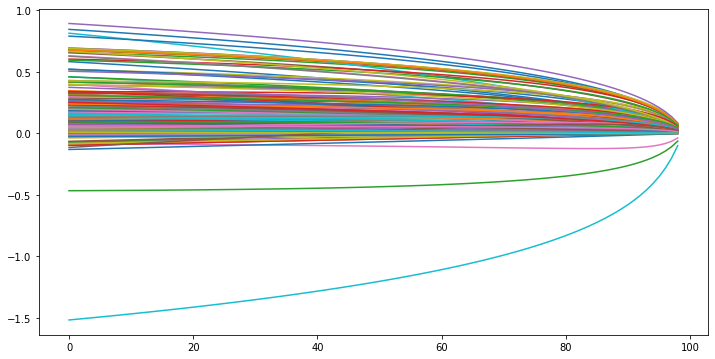

In [85]:
coefs_df_l2 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l2")
plot_reg_coefs(coefs_df_l2)

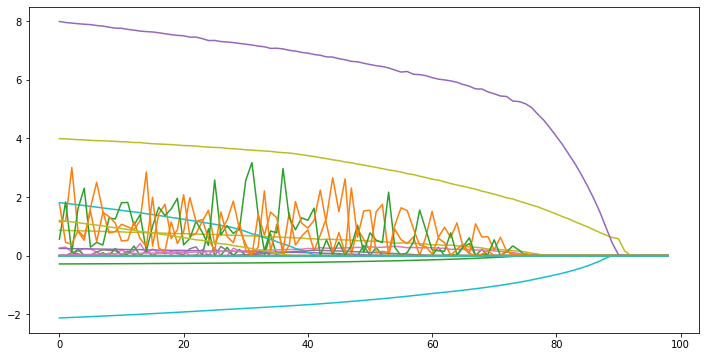

In [86]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")
plot_reg_coefs(coefs_df_l1)

In [87]:
reg_important_5_features = get_important_features(coefs_df_l1, n_feats_limit=5)
reg_important_10_features = get_important_features(coefs_df_l1, n_feats_limit=10)
reg_important_5_features, reg_important_10_features

(['bp_000', 'br_000', 'cc_000', 'cd_000', 'ci_000'],
 ['ac_000',
  'bp_000',
  'br_000',
  'bv_000',
  'cb_000',
  'cc_000',
  'cd_000',
  'ci_000',
  'cq_000'])

In [88]:
data_sample_balanced.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000,2000.000000,2000.00000,2000.00000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.00000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,0.500000,3.524491e+05,0.218000,1.832418e+08,862.158000,7.774000,20.489000,1227.164000,2.565184e+04,2.004894e+05,1.326390e+06,3.735159e+06,6.539972e+06,6.995544e+06,1.794638e+06,1.358080e+05,5.352047e+04,9.788497e+06,8.554715e+04,8.018236e+03,3.760980e+03,7.973501e+05,1.275537e+06,1.828885e+07,1.590067e+07,6.820375e+06,2.886888e+06,3.306000,1.876984e+03,6.650435e+04,5.627789e+03,4011.066000,937.745000,2.781650e+05,2.333149e+05,2.756851e+05,1.541773e+05,2.489857e+05,1.210470e+06,3.889195e+06,7.304262e+06,7.161678e+06,2.583069e+04,6.508048e+04,3.803599e+04,6.670936e+04,3.712630e+05,7.088375e+06,1.253145e+07,3.854959e

Let's check whether we would have the same result with only 5-10 features.

In [89]:
df_quality = assess_data(data_fillna_zero[[target_variable]+reg_important_5_features],
                         df_quality, exp_name="regularization_5", verbose=False)
df_quality

Train_shape: (42000, 5) Test shape: (18000, 5)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [90]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero[[target_variable]+reg_important_5_features])
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                         df_quality, exp_name="regularization_5_tuned_weights", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 5) Test shape: (18000, 5)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [91]:
df_quality = assess_data(data_fillna_zero[[target_variable]+reg_important_10_features],
                         df_quality, exp_name="regularization_10", verbose=False)
df_quality

Train_shape: (42000, 9) Test shape: (18000, 9)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [92]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero[[target_variable]+reg_important_10_features])
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                         df_quality, exp_name="regularization_10_tuned_weights", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])
df_quality

Train_shape: (42000, 9) Test shape: (18000, 9)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Training quality for model with 5 (or 10) most important features is worse than for baseline model.

<a id ='Logistic_Outliers'></a>

### Logistic Regression. Dealing with Outliers

In [93]:
data_reg_5 = data_fillna_zero[[target_variable]+reg_important_5_features].copy()
data_reg_10 = data_fillna_zero[[target_variable]+reg_important_10_features].copy()

In [94]:
data_reg_10.head()

,class,ac_000,bp_000,br_000,bv_000,cb_000,cc_000,cd_000,ci_000,cq_000
0,0,2.130706e+09,0.0,0.0,6700214.0,638360.0,6167850.0,1209600.0,5245752.00,6700214.0
1,0,0.000000e+00,0.0,0.0,3646660.0,6900.0,2942850.0,1209600.0,2291079.36,3646660.0
2,0,2.280000e+02,0.0,0.0,2673338.0,248240.0,2560566.0,1209600.0,2322692.16,2673338.0
3,0,7.000000e+01,0.0,0.0,21614.0,21400.0,7710.0,1209600.0,2135.04,21614.0
4,0,1.368000e+03,0.0,0.0,4289260.0,654700.0,3946944.0,1209600.0,3565684.80,4289260.0


In [95]:
data_reg_10.shape

(60000, 10)

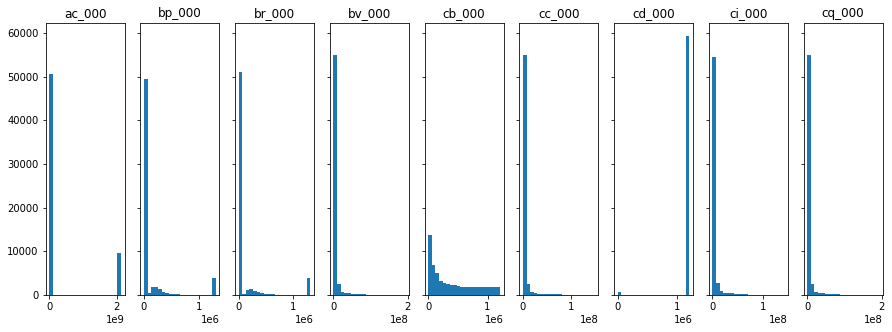

In [96]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10[f], bins=20)
plt.show()

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. It is named after the engineer-turned-biostatistician Charles P. Winsor (1895–1951). [Wikipedia](https://en.wikipedia.org/wiki/Winsorizing)

In [97]:
data_reg_5_STD_outliers = winsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="std", strategy='both')

data_reg_5_IQR_outliers = winsorization(
    data_reg_5, cols=reg_important_5_features, borders_type="iqr", strategy='both')

data_reg_10_STD_outliers = winsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="std", strategy='both')

data_reg_10_IQR_outliers = winsorization(
    data_reg_10, cols=reg_important_10_features, borders_type="iqr", strategy='both')

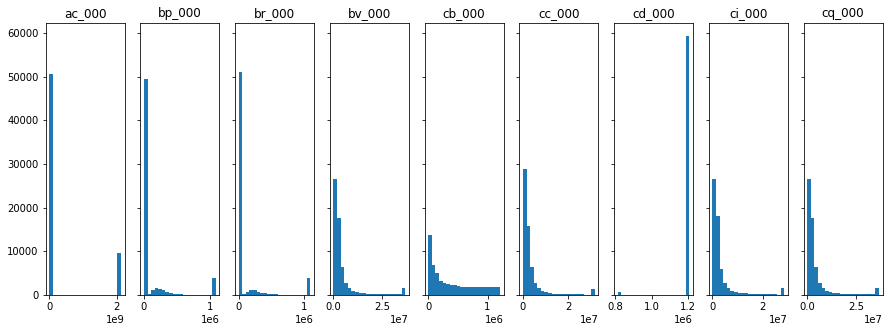

In [98]:
fig, ax = plt.subplots(1, len(reg_important_10_features),
                       sharey=True, figsize=(15, 5))
for i in range(len(reg_important_10_features)):
    f = reg_important_10_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_10_STD_outliers[f], bins=20)
plt.show()

In [99]:
df_quality = assess_data(data_reg_5_STD_outliers,
                         df_quality, exp_name="reg_5_outliers_std", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])

df_quality = assess_data(data_reg_5_IQR_outliers,
                         df_quality, exp_name="reg_5_outliers_iqr", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])

df_quality = assess_data(data_reg_10_STD_outliers,
                         df_quality, exp_name="reg_10_outliers_std", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])

df_quality = assess_data(data_reg_10_IQR_outliers,
                         df_quality, exp_name="reg_10_outliers_iqr", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])

df_quality

Train_shape: (42000, 5) Test shape: (18000, 5)
Train_shape: (42000, 5) Test shape: (18000, 5)
Train_shape: (42000, 9) Test shape: (18000, 9)
Train_shape: (42000, 9) Test shape: (18000, 9)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


#### Local Outlier Factor

In [100]:
X_train, X_test, y_train, y_test = data_split_train_test(data_reg_10)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Train_shape: (42000, 9) Test shape: (18000, 9)


In [101]:
X_train_scaled["LOF_outlier"] = get_lof_outliers(X_train_scaled)

X_test_scaled["LOF_outlier"] = get_lof_outliers(X_test_scaled)

C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Number of outliers: 4200 / 42000


C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Number of outliers: 1799 / 18000


In [102]:
df_quality = assess_data_wo_splitting(X_train_scaled, X_test_scaled, y_train, y_test,
                                     df_quality, exp_name="reg_10_lof_tuned_weights", verbose=False,
                        class_weight=tuned_class_weights['class_weight'])

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Winsorization and LOF couldn't make quality metrics noticeably higher for dataset with 5-10 features.

Another way to deal with imbalanced datasets is SMOTE.

<a id='Logistic_SMOTE'></a>

### Logistic Regression. Dealing with Unbalancing. SMOTE

In [103]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [104]:
X_train, X_test, y_train, y_test = data_split_train_test(data_reg_10)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (42000, 9) Test shape: (18000, 9)


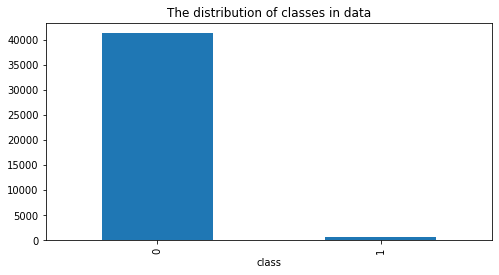

In [105]:
class_distribution_plot(pd.DataFrame(y_train))

In [106]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [107]:
X_train_scaled.shape, X_train_sampled.shape

((42000, 9), (82600, 9))

In [108]:
pd.Series(y_train_sampled).value_counts()

1    41300
0    41300
dtype: int64

In [109]:
df_quality = assess_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="reg_10_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Dataset with 10 important features has better training quality with tuned class weight parameters of Logistic regression rather than with SMOTE applied. However, SMOTE increased precision of the model in comparison with the tuned class weight parameter model.

#### Logistic Regression + SMOTE on the whole dataset without correlation and with filled NaN

In [110]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (42000, 112) Test shape: (18000, 112)


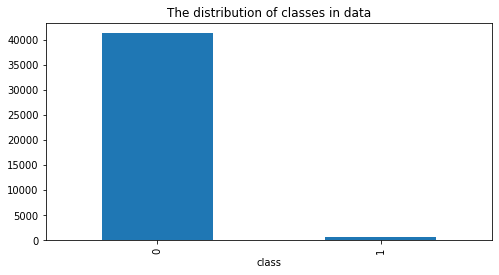

In [111]:
class_distribution_plot(pd.DataFrame(y_train))

In [112]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [113]:
X_train_scaled.shape, X_train_sampled.shape

((42000, 112), (82600, 112))

In [114]:
pd.Series(y_train_sampled).value_counts()

1    41300
0    41300
dtype: int64

In [115]:
df_quality = assess_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="data_wo_corr_fillna_zero_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


#### Logistic Regression + SMOTE on the whole initial dataset without NaNs.

In [116]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_nan)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (413, 170) Test shape: (178, 170)


In [117]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [118]:
X_train_scaled.shape, X_train_sampled.shape

((413, 170), (720, 170))

In [119]:
pd.Series(y_train_sampled).value_counts()

1    360
0    360
dtype: int64

In [120]:
df_quality = assess_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="data_wo_nan_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


It's interesting to compare SMOTE and class weighted approaches: <br>

| Dataset + model | Accuracy | Precision | Recall | F1 | ROC-AUC |
| --- | --- | --- | --- | --- | --- |
| baseline_class_weights_tuned | 0.944 | 0.783 | 0.783 | 0.783 | 0.875 |
| data_wo_nan_smote |0.944 | 0.913|	0.724| 0.808|0.855 |

#### Logistic Regression + SMOTE on the whole initial dataset without Correlation.

In [121]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_corr.dropna())
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (534, 112) Test shape: (230, 112)


In [122]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [123]:
X_train_scaled.shape, X_train_sampled.shape

((534, 112), (942, 112))

In [124]:
pd.Series(y_train_sampled).value_counts()

1    471
0    471
dtype: int64

In [125]:
df_quality = assess_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="data_wo_corr_wo_nan_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


#### Logistic Regression + SMOTE on the whole initial dataset without Correlation with Zero Imputation.

In [126]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (42000, 170) Test shape: (18000, 170)


In [127]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [128]:
X_train_scaled.shape, X_train_sampled.shape

((42000, 170), (82600, 170))

In [129]:
pd.Series(y_train_sampled).value_counts()

1    41300
0    41300
dtype: int64

In [130]:
df_quality = assess_data_wo_splitting(X_train_sampled, X_test_scaled, y_train_sampled, y_test,
                                     df_quality, exp_name="data_with_corr_fill_nan_zero_smote", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


<a id = 'Logistic_BFE'></a>

### Logistic Regression. Econometrical approach and BFE

In [131]:
import statsmodels.api as sm

In [132]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (42000, 170) Test shape: (18000, 170)


After some kernel restart I got *singular matrix* error on `Logit.fit()`. Due to [this source](#https://stackoverflow.com/questions/20703733/logit-regression-and-singular-matrix-error-in-python) I applied `method='bfgs'` parameter of `fit` function.

In [133]:
model = sm.Logit(y_train.values, X_train_scaled)
result = model.fit(method='bfgs')
result.summary()

         Current function value: 0.052630
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41830
Method:                           MLE   Df Model:                          169
Date:                Sat, 11 Apr 2020   Pseudo R-squ.:                  0.3791
Time:                        23:57:59   Log-Likelihood:                -2210.4
converged:                      False   LL-Null:                       -3560.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7831      5.836      0.134      0.893     -10.655      12.221
x2            -0.0164      2.558     -0.006      0.995      -5.030       4.997
x3            -1.5495      0.322     -4.810      0.000      -2.181      -0.918
x4            -0.0103      7.199     -0.001      0.999     -14.120      14.099
x5            -0.0112      6.305     -0.002      0.999     -12.369      12.346
x6            -0.0114      3.483     -0.003      0.997      -6.838       6.815
x7             0.0101     29.201      0.000      1.000     -57.223      57.243
x8             0.2335     34.868      0.007      0.995     -68.107      68.574
x9             0.5975     89.066      0.007      0.995    -173.968     175.163
x10            0.4229    534.850      0.001      0.999   -1047.864    1048.710
x11            0.0683   1930.194   3.54e-05      1.000   -3783.042    3783.178
x12            0.0202   1511.435   1.33e-05      1.000   -2962.337    2962.378
x13           -0.2374    654.861     -0.000      1.000   -1283.741    1283.266
x14           -0.4867    355.755     -0.001      0.999    -697.754     696.781
x15           -0.1954    149.352     -0.001      0.999    -292.919     292.528
x16            0.0285    212.572      0.000      1.000    -416.606     416.663
x17            0.7535     30.609      0.025      0.980     -59.240      60.747
x18           -0.0296      1.860     -0.016      0.987      -3.674       3.615
x19           -0.0674      1.948     -0.035      0.972      -3.886       3.751
x20           -0.0232      2.301     -0.010      0.992      -4.534       4.487
x21            0.4874      8.775      0.056      0.956     -16.711      17.686
x22            0.5465      6.494      0.084      0.933     -12.182      13.275
x23            0.7242     19.256      0.038      0.970     -37.016      38.465
x24            0.7878      7.638      0.103      0.918     -14.182      15.757
x25            0.2686     16.246      0.017      0.987     -31.573      32.110
x26            0.6558      2.892      0.227      0.821      -5.012       6.323
x27            0.2383      1.212      0.197      0.844      -2.138       2.614
x28            0.0463      2.079      0.022      0.982      -4.028       4.120
x29            0.2829      1.362      0.208      0.835      -2.386       2.951
x30            0.1034      3.442      0.030      0.976      -6.642       6.849
x31            0.2919      2.065      0.141      0.888      -3.755       4.339
x32            0.1948      1.715      0.114      0.910      -3.167       3.557
x33            0.1582   5.09e+04   3.11e-06      1.000   -9.98e+04    9.98e+04
x34            0.0909   8.11e+04   1.12e-06      1.000   -1.59e+05    1.59e+05
x35            0.3029   2.65e+04   1.14e-05      1.000   -5.19e+04    5.19e+04
x36            0.3622    1.4e+04   2.58e-05      1.000   -2.75e+04    2.75e+04
x37            0.1452   4.03e+04    3.6e-06      1.000    -7.9e+04     7.9e+04
x38            0.1957   8.34e+04   2.35e-06      1.000   -1.64e+05    1.64e+05
x3

In [134]:
choosed_columns = pd.DataFrame(X_train_scaled).columns

for iteration in range(len(choosed_columns)):
    
    model = sm.Logit(y_train.values, pd.DataFrame(X_train_scaled)[choosed_columns])
    result = model.fit(disp=False, method='bfgs')
    
    features = result.pvalues.index
    potentially_bad_index = result.pvalues.values.argmax()
    potentially_bad = features[potentially_bad_index]
    
    if result.pvalues.max() > 0.05:
        choosed_columns = [c for c in choosed_columns if c != potentially_bad]

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [135]:
model = sm.Logit(y_train.values, pd.DataFrame(X_train_scaled)[choosed_columns])
result = model.fit(disp=False,method='bfgs')
result.summary()

C:\Users\dinak\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                42000
Model:                          Logit   Df Residuals:                    41983
Method:                           MLE   Df Model:                           16
Date:                Sun, 12 Apr 2020   Pseudo R-squ.:                  0.4040
Time:                        00:05:52   Log-Likelihood:                -2121.9
converged:                      False   LL-Null:                       -3560.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2             -1.6283      0.308     -5.283      0.000      -2.232      -1.024
21             3.1315      1.021      3.067      0.002       1.130       5.133
23             3.1832      0.760      4.190      0.000       1.694       4.672
25             2.4739      0.618      4.002      0.000       1.262       3.685
40             3.0416      0.612      4.968      0.000       1.842       4.242
71             1.1883      0.282      4.214      0.000       0.636       1.741
79             4.2348      0.419     10.114      0.000       3.414       5.055
88             1.2046      0.536      2.247      0.025       0.154       2.255
89            -6.0700      0.104    -58.376      0.000      -6.274      -5.866
94             3.2758      0.815      4.021      0.000       1.679       4.872
95             3.4651      1.089      3.183      0.001       1.331       5.599
97             2.0311      0.461      4.403      0.000       1.127       2.935
98             1.7624      0.753      2.340      0.019       0.286       3.239
100            4.0055      1.491      2.687      0.007       1.083       6.928
137            2.5895      0.871      2.973      0.003       0.882       4.296
143            2.2936      0.752      3.049      0.002       0.819       3.768
148            2.4325      0.520      4.674      0.000       1.412       3.452
==============================================================================
"""

In [136]:
result.predict(pd.DataFrame(X_test_scaled)[choosed_columns])

0        0.003425
1        0.002393
2        0.190380
3        0.002455
4        0.003311
           ...   
17995    0.526694
17996    0.002517
17997    0.005356
17998    0.003987
17999    0.002769
Length: 18000, dtype: float64

In [137]:
econ_pred = (result.predict(pd.DataFrame(X_test_scaled)[choosed_columns])>=0.5).astype(float).values

In [138]:
quality_list = quality_report(econ_pred, y_test.values, verbose=False)

df_quality.loc["econ", :] = quality_list
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


Econometrical approach failed for that dataset.

<a id='KNN'></a>

## 7. Some KNN Models

Let's try **KNN classifier** for some dataset modifications.

In [139]:
X_train, X_test, y_train, y_test = data_split_train_test(data_wo_nan)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)
pred = model_KNN.predict(X_test_scaled)

quality_baseline_knn = quality_report(pred, y_test)
df_quality.loc["baseline_knn", :] = quality_baseline_knn
df_quality.round(3)

Train_shape: (413, 170) Test shape: (178, 170)

=== Quality Report ===
Accuracy: 	 0.921
Precision: 	 0.478
Recall: 	 0.846
f1_score: 	 0.611
ROC-AUC: 	 0.887



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


In [140]:
X_train, X_test, y_train, y_test = data_split_train_test(data_fillna_zero)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)
pred = model_KNN.predict(X_test_scaled)

quality_fill_nan_zero_knn = quality_report(pred, y_test)
df_quality.loc["data_fill_nan_zero_knn", :] = quality_fill_nan_zero_knn
df_quality.round(3)

Train_shape: (42000, 170) Test shape: (18000, 170)

=== Quality Report ===
Accuracy: 	 0.989
Precision: 	 0.447
Recall: 	 0.766
f1_score: 	 0.564
ROC-AUC: 	 0.878



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.961,0.783,0.900,0.837,0.934
baseline_file,0.945,0.733,0.957,0.830,0.950
baseline_class_weights_balanced,0.944,0.870,0.741,0.800,0.860
baseline_class_weights_tuned,0.944,0.783,0.783,0.783,0.875
baseline_class_weights_given,0.944,0.957,0.710,0.815,0.851
data_wo_corr_wo_nan,0.957,0.704,0.905,0.792,0.933
data_wo_corr_wo_nan_tuned_weights,0.970,0.852,0.885,0.868,0.933
data_wo_corr_wo_nan_tuned_weights_file,0.948,0.735,0.926,0.820,0.939
data_wo_corr_fill_nan_tuned_weights,0.986,0.567,0.594,0.580,0.794
data_wo_corr_fill_nan_tuned_weights_file,0.987,0.552,0.629,0.588,0.811


KNN results for our dataset are worse than logistic regression. There isn't class weighted KNN version in sklearn.

<a id="Conclusion"></a>

## 8. Conclusion

1. Train dataset with excluded NaNs has many attributes (ae000, ag000, ag001, ak000, ai000, at000, au000, ay000, etc). that can be used to separate classes. Due to dataset features the best result was achieved by baseline model (drop NaN + logistic regression). 
2. Result similar to that was achieved by (drop correlated features + drop NaN + logistic regression tuned weights).
3. Drop NaN performed better than imputation for our dataset.
4. Zero imputation seems to work better for our dataset than mode or median imputation.
5. Excluding correlated features for our dataset decreases model quality. May be it's because correlated feature to drop is chosen automatically(?) not via physical considerations.
6. Tuned weights as imbalanced dataset training technique seem to perform better than SMOTE.
7. Winsorization and LOF couldn't make quality metrics noticeably higher for dataset with 5-10 features.
8. Econometrical approach didn't help to gain better results on our dataset.
9. KNN performed worse than logistic regression for our dataset.